## JOB DATA SCRAPPING AND ANALYSIS FOR SOME TECH JOBS
  This project is a collaborative work among a team of tech professionals, which includes Business Analysts, Data Engineers, and Data Scientists from 10alytics Company.

#### PROBLEM STATEMENT
   The problem to be solved is to provide valuable insights into the job market, in other to assist employers and recruiters in making informed decisions and also help job seekers have access to information about the demand, trends and requirements within the UK tech sector . To address the problem , various UK job sites were scrapped by the team of Data Engineers, the data was analysed and visualised using Python, by the team of Data Scientists while the team of Busisness Analysts co-ordinated the team, facilitated meetings, report documentation and presentatation of the findings. Other key objectives included helping Educational tech providers to understand the skills in high demand, hence providing a guide to enable them develop relevant programmes to address the gap in the job market.

#### DATA SOURCING
   The dataset for this analysis was scrapped from various UK jobsites by the team of  Data engineers, it was retrieved from the PostgreSQL server for analysis. The initial data set provided had about 32,000 rows, which was later replaced with another set of data, because of the constraints which included, inconsistencies in data set, lots of missing data especially in the salary column, also the data containing specified tech jobs were too small for analysis.
 ##### The Data Engineers looked into it and based on our recommendation, provided new sets of data containing about 40,868 rows for analysis. 
   
 
#### FEATURES OF THE DATASET
Job Title -The title of the job position

Job City -City where the job is located

Date posted -The date when the job was posted

Company name -The name of the company or organisation offering the job

Job type -The type of job whether full time, part time, contract etc

Salary -Salary range for the listed job

Job link -job link

Job description -Description of the job title
 ###### The tech jobs titles were group into 13 categories, Data Engineer, Data Scientist, Data Analyst, Power Platform, IT Infrastructure and Cloud Computing, Software Engineer, Business Analyst, Product Manager, Project Manager, CyberSecurity, Gaming and Multimedia, UI/UX Designer and Software Tester.

#### STEPS OF ANALYSIS
Data Overview 
Data Preprocessing -Data Cleaning, Feature Engineering   
Exploratory Data Analysis  
Insights and Recommendation  
Constraints/Challenges

In [1]:
#import libraires

#Data  analysis 
import pandas as pd 
import numpy as np

#Data Visualisation
import seaborn as sns 
import matplotlib.pyplot as plt

%matplotlib inline
import missingno as msno

from wordcloud import WordCloud



#warning
import warnings
warnings.filterwarnings("ignore")



In [2]:
#Loading data

df = pd.read_csv(r"C:\Users\Windows\Downloads\jobs-raw (1).csv")
df.head(2)

,job_title,job_description,job_link,job_city,job_country,date_posted,salary,company_name,job_type,company
0,Game Developer,The Role\n\nWe invite developers of diverse ta...,https://uk.linkedin.com/jobs/view/game-develop...,London,GB,2023-06-14T19:16:14.000Z,NaN,Space Ape Games,FULLTIME,NaN
1,Game Developer,One Player Missions client is looking for an e...,https://uk.linkedin.com/jobs/view/game-develop...,NaN,GB,2023-07-18T13:28:51.000Z,NaN,One Player Mission,FULLTIME,NaN


## Data Overview/Understanding

In [3]:
# Looking at the tail part of the data set
df.tail()

,job_title,job_description,job_link,job_city,job_country,date_posted,salary,company_name,job_type,company
40864,Digital Platform Manager,You will feed into the continuous development ...,https://www.totaljobs.com/job/digital-manager/...,"LS1, Leeds",uk,2023-07-17T09:41:32.253,"£30000 - £42000 per annum + health, pension",WRK DIGITAL LTD,NaN,NaN
40865,"Proposition Manager, Investments","Job Title: Proposition Manager, Investments - ...",https://www.totaljobs.com/job/proposition-mana...,"Glasgow, Lanarkshire",uk,2023-07-28T09:24:04.37,Competitive,Royal London Group,NaN,NaN
40866,Category Manager Ecommerce,Position Title: Category Manager Ecommerce - Y...,https://www.totaljobs.com/job/category-manager...,UK,uk,2023-07-17T08:54:46.907,Competitive,Mccain Ltd,NaN,NaN
40867,Customer Experience and Proposition Manager,Lead as Product Owner on relevant projects / i...,https://www.totaljobs.com/job/proposition-mana...,UK,uk,2023-07-13T09:45:26.797,Competitive,Bnp Paribas,NaN,NaN
40868,Business Development Manager (Card Payments),Interacting with other Card Payments and exter...,https://www.totaljobs.com/job/business-develop...,London,uk,2023-08-09T02:07:44.173,Competitive,Revolut,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40869 entries, 0 to 40868
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   job_title        40869 non-null  object
 1   job_description  39911 non-null  object
 2   job_link         40868 non-null  object
 3   job_city         40714 non-null  object
 4   job_country      36631 non-null  object
 5   date_posted      24612 non-null  object
 6   salary           24853 non-null  object
 7   company_name     40264 non-null  object
 8   job_type         20039 non-null  object
 9   company          20 non-null     object
dtypes: object(10)
memory usage: 3.1+ MB


#### Insights: The data set has 40,869 entries, and data types all appear as object.

In [5]:
df.shape

(40869, 10)

#### Insights: Data set is made up of 40,869 rows and 10 columns

In [6]:
df.columns

Index(['job_title', 'job_description', 'job_link', 'job_city', 'job_country',
       'date_posted', 'salary', 'company_name', 'job_type', 'company'],
      dtype='object')

In [7]:
df.describe(include = 'all').T

,count,unique,top,freq
job_title,40869,13434,Business Analyst,717
job_description,39911,19888,About Us We’re an award-winning innovative tec...,344
job_link,40868,40868,https://uk.linkedin.com/jobs/view/game-develop...,1
job_city,40714,4609,London,10322
job_country,36631,4,United Kingdom,21578
date_posted,24612,13842,2023-08-03,1408
salary,24853,7826,Competitive,2954
company_name,40264,6080,Michael Page,372
job_type,20039,47,Permanent,8080
company,20,18,UNDERSTANDING RECRUITMENT,2


#### Insights: The general overview shows that Business Analyst is most advertised tech career, with London as the city with the highest job vacancy

In [8]:
#Checking for missing data
df.isnull().sum()

job_title              0
job_description      958
job_link               1
job_city             155
job_country         4238
date_posted        16257
salary             16016
company_name         605
job_type           20830
company            40849
dtype: int64

#### Insights: Every column has missing data except the job title column

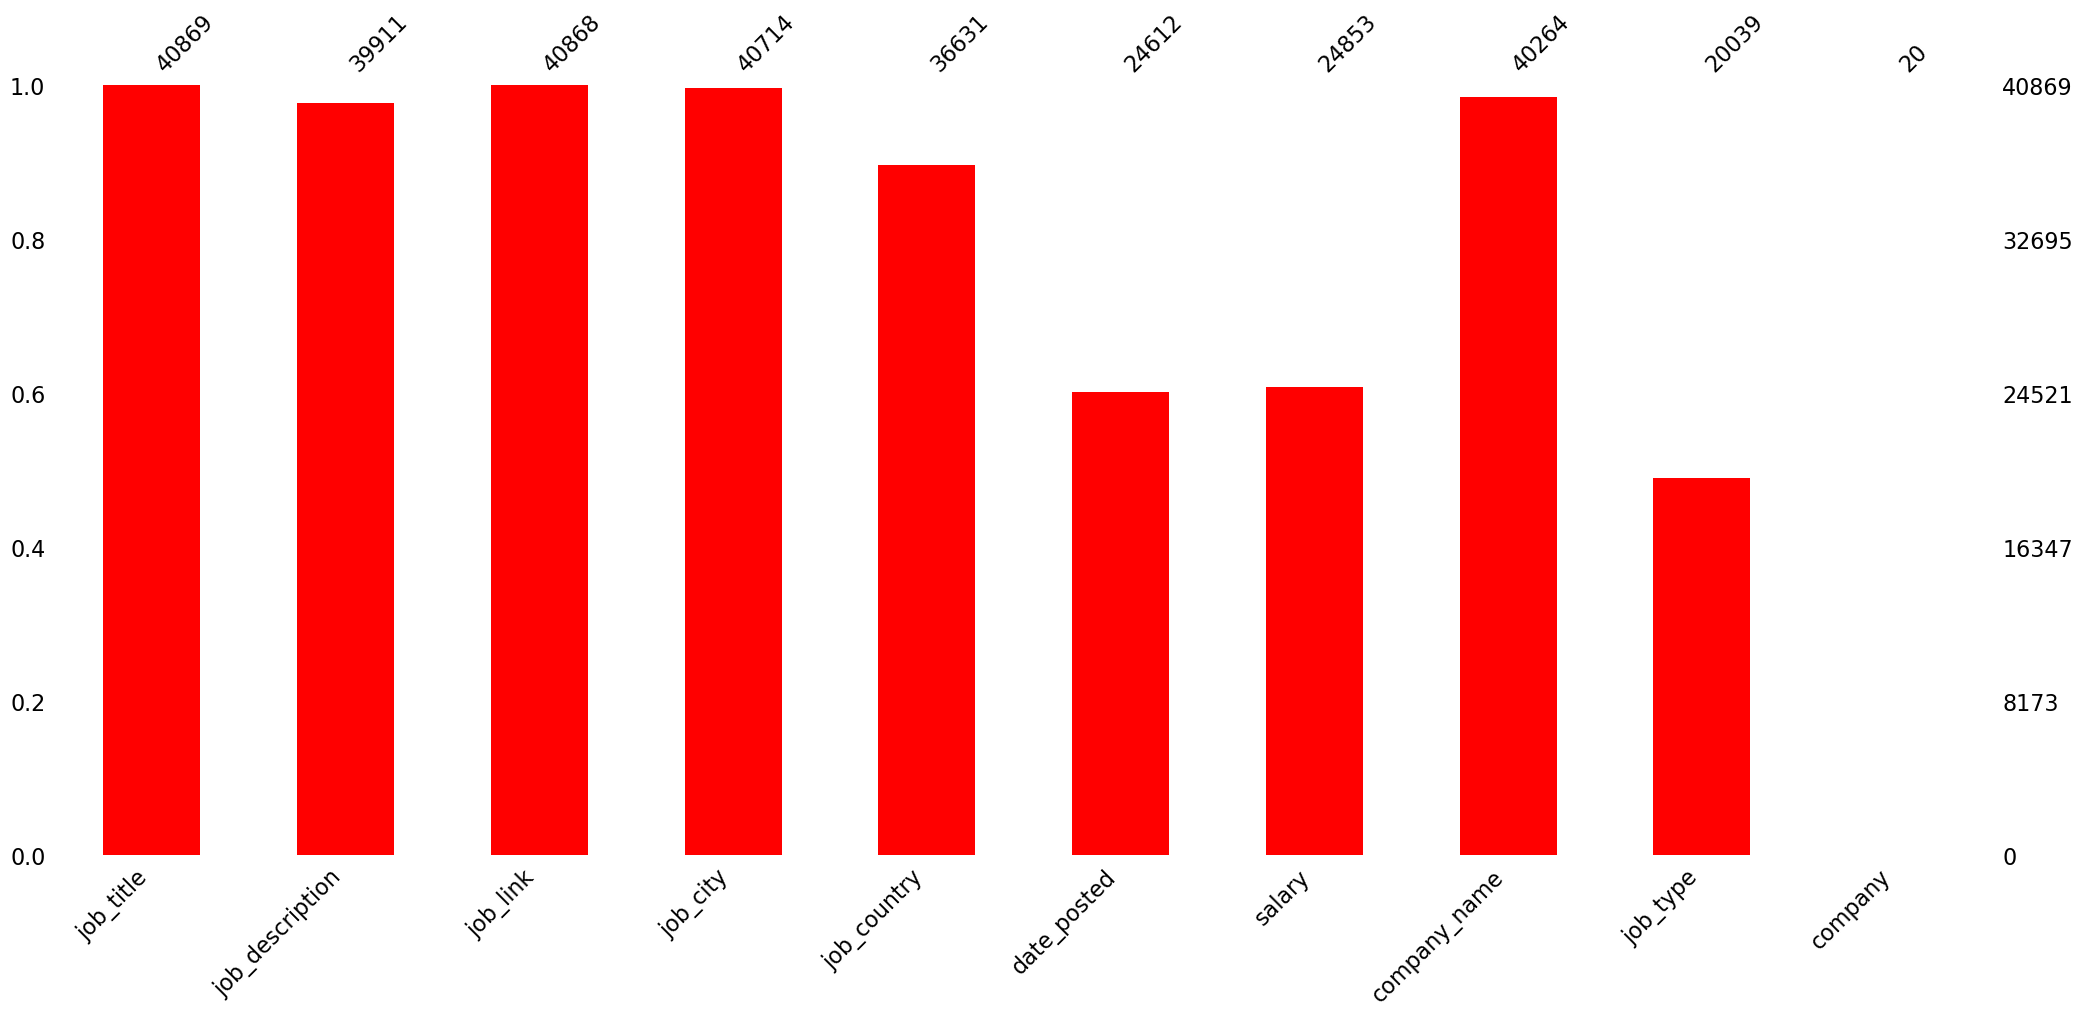

In [9]:
# Visualising the missing data
msno.bar(df, color = 'red');

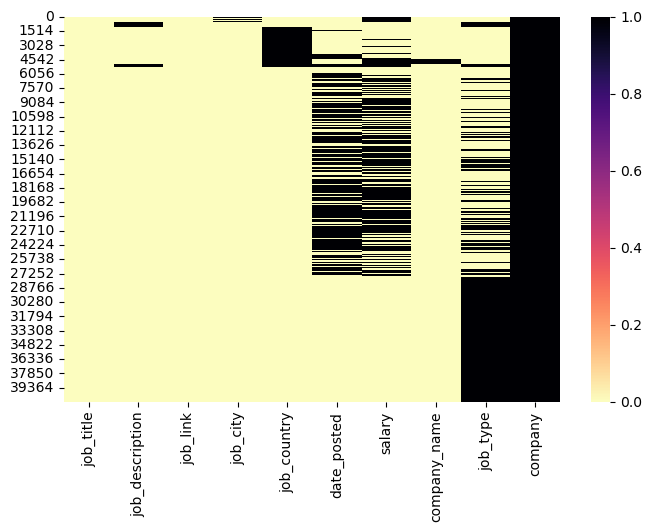

In [10]:
plt.figure(figsize=(8,5))
sns.heatmap(df.isnull(), cbar = True, cmap = 'magma_r');

#### Insights: There are lots of missing data across the columns, all the data in the company column is missing.

In [11]:
df.duplicated().sum()

0

## Data Preprocessing - 
Handling missing data, data cleaning, feature engineering

In [12]:
# Make a copy of the data set
df_copy = df.copy()
df_copy.head(2)

,job_title,job_description,job_link,job_city,job_country,date_posted,salary,company_name,job_type,company
0,Game Developer,The Role\n\nWe invite developers of diverse ta...,https://uk.linkedin.com/jobs/view/game-develop...,London,GB,2023-06-14T19:16:14.000Z,NaN,Space Ape Games,FULLTIME,NaN
1,Game Developer,One Player Missions client is looking for an e...,https://uk.linkedin.com/jobs/view/game-develop...,NaN,GB,2023-07-18T13:28:51.000Z,NaN,One Player Mission,FULLTIME,NaN


In [13]:
# Drop the job_link, since the job links are unique identifiers..

column_to_drop = 'job_link'
df = df.drop(column_to_drop, axis=1)
df.head(2)

,job_title,job_description,job_city,job_country,date_posted,salary,company_name,job_type,company
0,Game Developer,The Role\n\nWe invite developers of diverse ta...,London,GB,2023-06-14T19:16:14.000Z,NaN,Space Ape Games,FULLTIME,NaN
1,Game Developer,One Player Missions client is looking for an e...,NaN,GB,2023-07-18T13:28:51.000Z,NaN,One Player Mission,FULLTIME,NaN


#### Insights: Job link has been dropped, since its a unique value.

In [14]:
# To check for duplicates
df.duplicated().sum()

17599

In [15]:
# To view some of the duplicated rows
duplicate_rows = df[df.duplicated(keep=False)]
duplicate_rows

,job_title,job_description,job_city,job_country,date_posted,salary,company_name,job_type,company
84,Product Analyst - Game Development Kwalee Unit...,"Data Analysis & Science, Product Management De...",Leeds,GB,2023-08-11T10:26:09.000Z,NaN,Jobleads-UK,FULLTIME,NaN
159,Product Analyst - Game Development Kwalee Unit...,"Data Analysis & Science, Product Management De...",Glasgow,GB,2023-08-11T10:29:08.000Z,NaN,Jobleads-UK,FULLTIME,NaN
162,Product Analyst - Game Development Kwalee Unit...,"Data Analysis & Science, Product Management De...",Glasgow,GB,2023-08-11T10:29:08.000Z,NaN,Jobleads-UK,FULLTIME,NaN
203,Lead Level Designer,"Every great story has a new beginning, and you...",London,GB,2023-02-01T00:00:00.000Z,NaN,"TT Games, WARNERMEDIA",FULLTIME,NaN
227,Product Analyst - Game Development Kwalee Unit...,"Data Analysis & Science, Product Management De...",Leeds,GB,2023-08-11T10:26:09.000Z,NaN,Jobleads-UK,FULLTIME,NaN
...,...,...,...,...,...,...,...,...,...
27499,IT Technical Business Analyst,Müller has been a loved brand in the UK for ov...,East Kilbride,United Kingdom,NaN,NaN,Unternehmensgruppe Theo Müller,Full-time,NaN
27500,Commercial Analyst,Want to provide insights that make a differenc...,Slough,United Kingdom,NaN,NaN,Reckitt,NaN,NaN
27501,Business Analyst / Team Lead - Digital Agency,Business Analyst / Team Lead St Albans / WFH t...,St Albans,United Kingdom,2023-07-26,£60k,Client Server,Permanent,NaN
27502,Senior Change Analyst,Want to do the best work of your life? Make yo...,Dunfermline,United Kingdom,2023-08-02,NaN,Sky,Full-time,NaN


#### Insights: Index number 159 and 162 are the same, hence there are some  duplicated rows.

In [16]:
more_duplicated_rows = df.loc[df['job_title'] == 'BI Analyst']
more_duplicated_rows.tail(40) 

,job_title,job_description,job_city,job_country,date_posted,salary,company_name,job_type,company
25906,BI Analyst,"BI Data & Analytics, Data Analysis & Insights\...",Leeds,United Kingdom,2023-08-04,"Up to £35,000",Oscar Technology,Permanent,NaN
25964,BI Analyst,"BI Data & Analytics, Data Analysis & Insights\...",Leeds,United Kingdom,2023-08-04,"Up to £35,000",Oscar Technology,Permanent,NaN
25988,BI Analyst,"BI Data & Analytics, Data Analysis & Insights\...",Leeds,United Kingdom,2023-08-04,"Up to £35,000",Oscar Technology,Permanent,NaN
26004,BI Analyst,"BI Data & Analytics, Data Analysis & Insights\...",Leeds,United Kingdom,2023-08-04,"Up to £35,000",Oscar Technology,Permanent,NaN
26026,BI Analyst,"BI Data & Analytics, Data Analysis & Insights\...",Leeds,United Kingdom,2023-08-04,"Up to £35,000",Oscar Technology,Permanent,NaN
26046,BI Analyst,"BI Data & Analytics, Data Analysis & Insights\...",Leeds,United Kingdom,2023-08-04,"Up to £35,000",Oscar Technology,Permanent,NaN
26066,BI Analyst,"BI Data & Analytics, Data Analysis & Insights\...",Leeds,United Kingdom,2023-08-04,"Up to £35,000",Oscar Technology,Permanent,NaN
26086,BI Analyst,"BI Data & Analytics, Data Analysis & Insights\...",Leeds,United Kingdom,2023-08-04,"Up to £35,000",Oscar Technology,Permanent,NaN
26126,BI Analyst,"BI Data & Analytics, Data Analysis & Insights\...",Leeds,United Kingdom,2023-08-04,"Up to £35,000",Oscar Technology,Permanent,NaN
26146,BI Analyst,"BI Data & Analytics, Data Analysis & Insights\...",Leeds,United Kingdom,2023-08-04,"Up to £35,000",Oscar Technology,Permanent,NaN


#### Insights: More duplicated rows noted above.

In [17]:
# To remove duplicates
df = df.drop_duplicates()
df

,job_title,job_description,job_city,job_country,date_posted,salary,company_name,job_type,company
0,Game Developer,The Role\n\nWe invite developers of diverse ta...,London,GB,2023-06-14T19:16:14.000Z,NaN,Space Ape Games,FULLTIME,NaN
1,Game Developer,One Player Missions client is looking for an e...,NaN,GB,2023-07-18T13:28:51.000Z,NaN,One Player Mission,FULLTIME,NaN
2,Game Designer/ Interactive Storytelling Cutsce...,• Job Title - Game Designer / Interactive Stor...,NaN,GB,2023-08-07T00:00:00.000Z,NaN,Kwalee,FULLTIME,NaN
3,Senior/Principal Level Designer,About Sumo Nottingham\n\nSumo Nottingham devel...,Nottingham,GB,2023-08-11T21:12:08.000Z,NaN,Sumo Digital Ltd,FULLTIME,NaN
4,Product Analyst - Game Development,• Job Title - Product Analyst - Game Developme...,NaN,GB,2023-08-09T00:00:00.000Z,NaN,Kwalee,FULLTIME,NaN
...,...,...,...,...,...,...,...,...,...
40864,Digital Platform Manager,You will feed into the continuous development ...,"LS1, Leeds",uk,2023-07-17T09:41:32.253,"£30000 - £42000 per annum + health, pension",WRK DIGITAL LTD,NaN,NaN
40865,"Proposition Manager, Investments","Job Title: Proposition Manager, Investments - ...","Glasgow, Lanarkshire",uk,2023-07-28T09:24:04.37,Competitive,Royal London Group,NaN,NaN
40866,Category Manager Ecommerce,Position Title: Category Manager Ecommerce - Y...,UK,uk,2023-07-17T08:54:46.907,Competitive,Mccain Ltd,NaN,NaN
40867,Customer Experience and Proposition Manager,Lead as Product Owner on relevant projects / i...,UK,uk,2023-07-13T09:45:26.797,Competitive,Bnp Paribas,NaN,NaN


#### Insights: Duplicates removed.

In [18]:
df.shape

(23270, 9)

#### Insights: After dropping the duplicated rows, we are left with 23,270 rows and 9 columns

### Handling Missing Data

In [19]:
# Percentage of missing data for each column
missing_data = df.isnull().sum()/ len(df) * 100
missing_data

job_title           0.000000
job_description     3.317576
job_city            0.666094
job_country        16.935969
date_posted        17.391491
salary             21.276321
company_name        2.599914
job_type           66.699613
company            99.914052
dtype: float64

#### Insights: There are some missing data in the dataset, the company column has almost 100% missing data, this will be dropped. The job type has about 67% missing data (above 50%), this will be filled with the mode, but may affect the integrity of the data. The rest of the columns have missing data below 22% and will be filled with mode, mean or median, depending on the data type or dropped if its not important.

In [20]:
# Drop company column because it has about 100% missing values

column_to_drop = 'company'

df= df.drop(column_to_drop, axis=1)
df.head(2)

,job_title,job_description,job_city,job_country,date_posted,salary,company_name,job_type
0,Game Developer,The Role\n\nWe invite developers of diverse ta...,London,GB,2023-06-14T19:16:14.000Z,NaN,Space Ape Games,FULLTIME
1,Game Developer,One Player Missions client is looking for an e...,NaN,GB,2023-07-18T13:28:51.000Z,NaN,One Player Mission,FULLTIME


In [21]:
# Drop date posted column - Not required 

column_to_drop = 'date_posted'
df = df.drop(column_to_drop, axis=1)
df.head(2)

,job_title,job_description,job_city,job_country,salary,company_name,job_type
0,Game Developer,The Role\n\nWe invite developers of diverse ta...,London,GB,NaN,Space Ape Games,FULLTIME
1,Game Developer,One Player Missions client is looking for an e...,NaN,GB,NaN,One Player Mission,FULLTIME


#### Insights: company and date posted  columns were dropped

In [22]:
# Determine the mode for each column, since they are all in object form

mode_values = df.mode().iloc[0]
mode_values

job_title                                            Project Manager
job_description    We are looking for a Community Delivery Manage...
job_city                                                      London
job_country                                                       uk
salary                                                   Competitive
company_name                                                  Atkins
job_type                                                   Permanent
Name: 0, dtype: object

In [23]:
# Filling missing data with mode
df1 = df.fillna(mode_values)
df1

,job_title,job_description,job_city,job_country,salary,company_name,job_type
0,Game Developer,The Role\n\nWe invite developers of diverse ta...,London,GB,Competitive,Space Ape Games,FULLTIME
1,Game Developer,One Player Missions client is looking for an e...,London,GB,Competitive,One Player Mission,FULLTIME
2,Game Designer/ Interactive Storytelling Cutsce...,• Job Title - Game Designer / Interactive Stor...,London,GB,Competitive,Kwalee,FULLTIME
3,Senior/Principal Level Designer,About Sumo Nottingham\n\nSumo Nottingham devel...,Nottingham,GB,Competitive,Sumo Digital Ltd,FULLTIME
4,Product Analyst - Game Development,• Job Title - Product Analyst - Game Developme...,London,GB,Competitive,Kwalee,FULLTIME
...,...,...,...,...,...,...,...
40864,Digital Platform Manager,You will feed into the continuous development ...,"LS1, Leeds",uk,"£30000 - £42000 per annum + health, pension",WRK DIGITAL LTD,Permanent
40865,"Proposition Manager, Investments","Job Title: Proposition Manager, Investments - ...","Glasgow, Lanarkshire",uk,Competitive,Royal London Group,Permanent
40866,Category Manager Ecommerce,Position Title: Category Manager Ecommerce - Y...,UK,uk,Competitive,Mccain Ltd,Permanent
40867,Customer Experience and Proposition Manager,Lead as Product Owner on relevant projects / i...,UK,uk,Competitive,Bnp Paribas,Permanent


#### Insights: Missing data filled with mode value.

In [24]:
# Rechecked for missing data
df1.isnull().sum()

job_title          0
job_description    0
job_city           0
job_country        0
salary             0
company_name       0
job_type           0
dtype: int64

## Feature Engineering
#### Looking into different columns

In [25]:
# Looking into the job_title column
# To get distinct job titles
distinct_job_titles = df1['job_title'].unique()


#Print the distinct job titles
print("Distinct Job Titles:")
for job_title in distinct_job_titles:
    print(job_title)

Distinct Job Titles:
Game Developer
Game Designer/ Interactive Storytelling Cutscene Specialist
Senior/Principal Level Designer
Product Analyst - Game Development
Gameplay Programmer – AAA Games – Hybrid/ Liverpool, UK
Unity Developer
Game Designer - Hybrid Mobile Games
Junior Game Developer
Lead Engine Tools Programmer
Unity Game Developer
First Light Games Senior Game Developer London, United Kingdom Senior · Full time
External Producer
AI / Gameplay Programmer
Senior Game Programmer
Unreal Engine or Unity Developer
Lead Game Programmer - Mobile Games
Associate Producer
Lead Game Designer
Games Developer (JavaScript)
Game Designer
Senior Technical Audio Designer
Principal Game Designer
Senior Game Designer - Hybrid Casual Games
Live Associate Producer
Lead Games Designer
Junior JavaScript Games Developer
Software Engineer - Backend
Roblox Game Developer
Game Director
Game Designer - New IP
Lead Audio Designer New IP
Senior/ Executive Game Producer - PC / Console Games
Senior Renderin

In [26]:
#selected jobs into different groups and create a column called job_category

# Define a function to categorise jobs based on keywords

keywords = ['manager', 'tester', 'software tester', 'QA engineer, software tester','business' 'test automation','games','product', 'lead','product',  'planning', 'project management', 'product management' , 'game', 'programmer', 'manual testing', 'test plans', 'test cases', 'quality assurance engineer', 'bug tracking' ,'testing', 'cloud', 'devops', 'cloud engineer', 'devops engineer', 'cloud architect', 'architect','AWS', 'Azure' , 'Google Cloud', 'API','power platform', 'power apps', 'power automate', 'power', 'platform', 'power virtual agent', 'power bi', 'game designer', '3D modeling', 'game programmer', 'game programming', 'gameplay', 'animation', 'virtual reality', 'VR', 'augmented reality','AR', 'multimedia production', 'network security', 'cyber','security', 'network engineer', 'network administrator', 'cybersecurity analyst', 'penetration testing', 'firewall', 'intrusion detection', 'VPN', 'network architecture', 'network protocols', 'encryption', 'software', 'software engineer', 'java', 'javascript', 'developer', 'front end', 'software development', 'business intelligence', 'bi', 'business analyst', 'machine learning', 'ai', 'artificial intelligence', 'python', 'data scientist', 'eda','data engineer', 'data infrastructure', 'etl processes', 'data warehousing', 'data', 'analyst', 'analytics','design', 'designer', 'graphics', 'UI', 'UX', 'project']

def selected_jobs(job_title, keywords):
    job_title_lower = job_title.lower()
    
    if any(keyword.lower() in job_title_lower for keyword in keywords):
        
        if any(keyword.lower() in job_title_lower for keyword in ['cloud', 'devops', 'cloud engineer', 'devops engineer','architect', 'AWS', 'Azure' , 'Google Cloud', 'API' ]):
            return 'IT Infrastructure and Cloud Computing'
        elif any(keyword.lower() in job_title_lower for keyword in ['tester', 'software tester', 'QA engineer, software tester', 'test automation', 'manual testing', 'test plans', 'test cases', 'quality assurance engineer', 'bug tracking' ,'testing']):
            return 'Software Tester'
        elif any(keyword.lower() in job_title_lower for keyword in ['power platform', 'power apps', 'power automate', 'power', 'platform', 'power virtual agent']):
            return 'Power Platform'
        elif any(keyword.lower() in job_title_lower for keyword in ['network security', 'cyber','security', 'network engineer', 'network administrator', 'cybersecurity analyst', 'penetration testing', 'firewall', 'intrusion detection', 'VPN', 'network architecture', 'network protocols', 'encryption']):
            return 'Cyber Security'
        elif any(keyword.lower() in job_title_lower for keyword in ['software', 'software engineer','programmer', 'java', 'javascript', 'developer', 'front end', 'software development']):
            return 'Software Engineer' 
        elif any(keyword.lower() in job_title_lower for keyword in ['game designer','game', 'games', '3D modeling', 'game programmer', 'game programming', 'gameplay', 'animation', 'virtual reality', 'VR', 'augmented reality','AR', 'multimedia production']):
            return 'Gaming and Multimedia'
        elif any(keyword.lower() in job_title_lower for keyword in ['business intelligence', 'bi', 'business analyst','business']):
            return 'Business Analyst'
        elif any(keyword.lower() in job_title_lower for keyword in ['machine learning', 'ai', 'artificial intelligence', 'python', 'data scientist', 'eda']):
            return 'Data Scientist'
        elif any(keyword.lower() in job_title_lower for keyword in ['data engineer', 'data infrastructure', 'etl processes', 'data warehousing']):
            return 'Data Engineer'
        elif any(keyword.lower() in job_title_lower for keyword in ['data', 'analyst', 'analytics']):
            return 'Data Analyst'
        elif any(keyword.lower() in job_title_lower for keyword in ['project', 'project management']):
            return 'Project Manager'
        elif any(keyword.lower() in job_title_lower for keyword in ['product', 'lead','product  planning', 'product management']):
            return 'Product Manager'
        elif any(keyword.lower() in job_title_lower for keyword in ['design', 'designer', 'graphics', 'ui', 'ux']):
            return 'UI/UX Designer'
        else:
            return 'Others'
    else:
        return 'Others'
    
    
 # Apply the categorization function to each job title
df1['job_category'] = df1['job_title'].apply(lambda job_title: selected_jobs(job_title, keywords));
df1


,job_title,job_description,job_city,job_country,salary,company_name,job_type,job_category
0,Game Developer,The Role\n\nWe invite developers of diverse ta...,London,GB,Competitive,Space Ape Games,FULLTIME,Software Engineer
1,Game Developer,One Player Missions client is looking for an e...,London,GB,Competitive,One Player Mission,FULLTIME,Software Engineer
2,Game Designer/ Interactive Storytelling Cutsce...,• Job Title - Game Designer / Interactive Stor...,London,GB,Competitive,Kwalee,FULLTIME,Gaming and Multimedia
3,Senior/Principal Level Designer,About Sumo Nottingham\n\nSumo Nottingham devel...,Nottingham,GB,Competitive,Sumo Digital Ltd,FULLTIME,UI/UX Designer
4,Product Analyst - Game Development,• Job Title - Product Analyst - Game Developme...,London,GB,Competitive,Kwalee,FULLTIME,Gaming and Multimedia
...,...,...,...,...,...,...,...,...
40864,Digital Platform Manager,You will feed into the continuous development ...,"LS1, Leeds",uk,"£30000 - £42000 per annum + health, pension",WRK DIGITAL LTD,Permanent,Power Platform
40865,"Proposition Manager, Investments","Job Title: Proposition Manager, Investments - ...","Glasgow, Lanarkshire",uk,Competitive,Royal London Group,Permanent,Others
40866,Category Manager Ecommerce,Position Title: Category Manager Ecommerce - Y...,UK,uk,Competitive,Mccain Ltd,Permanent,Others
40867,Customer Experience and Proposition Manager,Lead as Product Owner on relevant projects / i...,UK,uk,Competitive,Bnp Paribas,Permanent,Others


#### Insights: Job title grouped into Job Categories, new column called job_category is created

In [27]:
# Looking into the job type column
distinct_job_type = df1['job_type'].unique()

# Print the distinct job type
print("Distinct Job Types:")
for job_type in distinct_job_type:
    print(job_type)

Distinct Job Types:
FULLTIME
Permanent
INTERN
CONTRACTOR
PARTTIME
VOLUNTEER
TEMPORARY
Full-Time
Contract
Temporary
Contract, Permanent
Contract, Temporary
Contract, Part Time
Freelance
Part Time
Part Time, Permanent
Apprenticeship
Contract, Permanent, Temporary
Contract, Part Time, Temporary
Part Time, Permanent, Temporary
Full-Time/Part-Time
Contract, Part Time, Permanent
Employee
Part-Time
Permanent, full-time
Contract, full-time
Full-time , Permanent
Full-time
Full-time , Contract
Part-time
Contract , Permanent
Full-time , Part-time , Contract
Full-time , Temporary
Full-time , Part-time , Permanent
Full-time , Part-time
Full-time , Apprenticeship
Part-time , Internship
Temporary , Contract
Full-time , Internship
Internship
Full-time , Permanent , Apprenticeship
Part-time , Permanent
Full-time , Part-time , Apprenticeship
Part-time , Contract
Full-time , Temporary , Contract
Full-time , Contract , Permanent
Temp


In [28]:
# Categorising job type as employment type based on keywords

keywords =['FULLTIME', 'Full-Time', 'full-time', 'Full-time','PARTTIME', 'Part Time', 'Part-Time', 'Part-time','Part-time','Permanent', 'INTERN', 'Apprenticeship','Internship','CONTRACTOR','Contract','VOLUNTEER','TEMPORARY','Temporary','Temp','Freelance','Employee']

def employment_type(job_type, keywords):
    job_type_lower = job_type.lower()
    
    if any(keyword.lower() in job_type_lower for keyword in keywords):
        if any(keyword.lower() in job_type_lower for keyword in ['VOLUNTEER']):
            return 'volunteer'
        elif any(keyword.lower() in job_type_lower for keyword in ['INTERN', 'Apprenticeship','Internship']):
            return 'intern'
        elif any(keyword.lower() in job_type_lower for keyword in ['FULLTIME', 'Full-Time', 'full-time', 'Full-time','PARTTIME', 'Part Time', 'Part-Time', 'Part-time','Part-time','Permanent', 'CONTRACTOR','Contract','VOLUNTEER','TEMPORARY','Temporary','Temp','Freelance','Employee']):
            return 'paid staff'
        else:
            return 'unknown'
        
# Apply the categorization function to each job title
df1['employment_type'] = df1['job_type'].apply(lambda job_type: employment_type(job_type, keywords))
df1        

,job_title,job_description,job_city,job_country,salary,company_name,job_type,job_category,employment_type
0,Game Developer,The Role\n\nWe invite developers of diverse ta...,London,GB,Competitive,Space Ape Games,FULLTIME,Software Engineer,paid staff
1,Game Developer,One Player Missions client is looking for an e...,London,GB,Competitive,One Player Mission,FULLTIME,Software Engineer,paid staff
2,Game Designer/ Interactive Storytelling Cutsce...,• Job Title - Game Designer / Interactive Stor...,London,GB,Competitive,Kwalee,FULLTIME,Gaming and Multimedia,paid staff
3,Senior/Principal Level Designer,About Sumo Nottingham\n\nSumo Nottingham devel...,Nottingham,GB,Competitive,Sumo Digital Ltd,FULLTIME,UI/UX Designer,paid staff
4,Product Analyst - Game Development,• Job Title - Product Analyst - Game Developme...,London,GB,Competitive,Kwalee,FULLTIME,Gaming and Multimedia,paid staff
...,...,...,...,...,...,...,...,...,...
40864,Digital Platform Manager,You will feed into the continuous development ...,"LS1, Leeds",uk,"£30000 - £42000 per annum + health, pension",WRK DIGITAL LTD,Permanent,Power Platform,paid staff
40865,"Proposition Manager, Investments","Job Title: Proposition Manager, Investments - ...","Glasgow, Lanarkshire",uk,Competitive,Royal London Group,Permanent,Others,paid staff
40866,Category Manager Ecommerce,Position Title: Category Manager Ecommerce - Y...,UK,uk,Competitive,Mccain Ltd,Permanent,Others,paid staff
40867,Customer Experience and Proposition Manager,Lead as Product Owner on relevant projects / i...,UK,uk,Competitive,Bnp Paribas,Permanent,Others,paid staff


#### Insights: Job type grouped into paid staff, volunteer and intern, new column called employment_type is created

In [29]:
# Looking into the salary feature
df1['salary']

0                                        Competitive
1                                        Competitive
2                                        Competitive
3                                        Competitive
4                                        Competitive
                            ...                     
40864    £30000 - £42000 per annum + health, pension
40865                                    Competitive
40866                                    Competitive
40867                                    Competitive
40868                                    Competitive
Name: salary, Length: 23270, dtype: object

In [30]:
# locate and remove any row that does not have a numerical value in the salary column

pattern = r'^[^0-9]*$'

df2 = df1.loc[~df1['salary'].str.contains(pattern, case=False, na=False)]
df2

,job_title,job_description,job_city,job_country,salary,company_name,job_type,job_category,employment_type
26,Junior JavaScript Games Developer,If you are looking to join a high tech industr...,Newtown,GB,27000.0,CareerAddict,FULLTIME,Software Engineer,paid staff
55,Junior JavaScript Games Developer,If you are looking to join a high tech industr...,Branston,GB,27000.0,GSA Techsource Ltd,FULLTIME,Software Engineer,paid staff
65,Lead C++ Games Developer,Lead C++ Games Developer | AAA Games | Up to £...,London,GB,80000.0,Langham Recruitment,FULLTIME,Software Engineer,paid staff
85,Cyber Security Specialist,Location: We operate a hybrid working model an...,London,GB,59400.0,Office for National Statistics,FULLTIME,Cyber Security,paid staff
86,Business Analyst,We are looking for a Community Delivery Manage...,Remote,uk,"£40,000 - £46,000 per year",Understanding Recruitment Ltd,Permanent,Business Analyst,paid staff
...,...,...,...,...,...,...,...,...,...
40859,Product Compliance Lead,Join a worldwide manufacturing company as a Pr...,"BN9, Newhaven",uk,£45000 - £50000 per annum,Recruitment Genius,Permanent,Product Manager,paid staff
40860,Manager E-Commerce,E Commerce Manager Job Title: E Commerce Manag...,"LE12, Loughborough",uk,"Up to £50,000 per annum",Osprey Engineering Solutions Limited,Permanent,Others,paid staff
40861,VP of Product - Financial Management Systems /...,This role will lead 3 Product Managers & 8 Pro...,"Manchester, Greater Manchester",uk,£135000 - £150000 per annum + 20% performance ...,Oscar Associates (UK) Limited,Permanent,Product Manager,paid staff
40862,CRO/Site Performance Manager - eCommerce - 100...,Role: CRO Manager eCommerce * A pre-booked mee...,"Teddington, London",uk,£30k - £45k,Blue Pelican Group,Permanent,Others,paid staff


#### Insights: Located and dropped rows where there are no numeric values, in the salary column. The number of rows in the dataset in now 12,777.

In [31]:
# Reset the index to prevent inconsistency

df2 = df2.reset_index(drop=True)
df2

,job_title,job_description,job_city,job_country,salary,company_name,job_type,job_category,employment_type
0,Junior JavaScript Games Developer,If you are looking to join a high tech industr...,Newtown,GB,27000.0,CareerAddict,FULLTIME,Software Engineer,paid staff
1,Junior JavaScript Games Developer,If you are looking to join a high tech industr...,Branston,GB,27000.0,GSA Techsource Ltd,FULLTIME,Software Engineer,paid staff
2,Lead C++ Games Developer,Lead C++ Games Developer | AAA Games | Up to £...,London,GB,80000.0,Langham Recruitment,FULLTIME,Software Engineer,paid staff
3,Cyber Security Specialist,Location: We operate a hybrid working model an...,London,GB,59400.0,Office for National Statistics,FULLTIME,Cyber Security,paid staff
4,Business Analyst,We are looking for a Community Delivery Manage...,Remote,uk,"£40,000 - £46,000 per year",Understanding Recruitment Ltd,Permanent,Business Analyst,paid staff
...,...,...,...,...,...,...,...,...,...
12772,Product Compliance Lead,Join a worldwide manufacturing company as a Pr...,"BN9, Newhaven",uk,£45000 - £50000 per annum,Recruitment Genius,Permanent,Product Manager,paid staff
12773,Manager E-Commerce,E Commerce Manager Job Title: E Commerce Manag...,"LE12, Loughborough",uk,"Up to £50,000 per annum",Osprey Engineering Solutions Limited,Permanent,Others,paid staff
12774,VP of Product - Financial Management Systems /...,This role will lead 3 Product Managers & 8 Pro...,"Manchester, Greater Manchester",uk,£135000 - £150000 per annum + 20% performance ...,Oscar Associates (UK) Limited,Permanent,Product Manager,paid staff
12775,CRO/Site Performance Manager - eCommerce - 100...,Role: CRO Manager eCommerce * A pre-booked mee...,"Teddington, London",uk,£30k - £45k,Blue Pelican Group,Permanent,Others,paid staff


#### Insights: Index was reset to reorder the data and for consistency in numbering

In [32]:
# Remove pounds symbol,K,k and commas
df2['salary'] = df2['salary'].str.replace('£', '')
df2['salary'] = df2['salary'].str.replace('K', '000')
df2['salary'] = df2['salary'].str.replace('k', '000')
df2['salary'] = df2['salary'].str.replace(',', '')
df2.head(40)

,job_title,job_description,job_city,job_country,salary,company_name,job_type,job_category,employment_type
0,Junior JavaScript Games Developer,If you are looking to join a high tech industr...,Newtown,GB,27000.0,CareerAddict,FULLTIME,Software Engineer,paid staff
1,Junior JavaScript Games Developer,If you are looking to join a high tech industr...,Branston,GB,27000.0,GSA Techsource Ltd,FULLTIME,Software Engineer,paid staff
2,Lead C++ Games Developer,Lead C++ Games Developer | AAA Games | Up to £...,London,GB,80000.0,Langham Recruitment,FULLTIME,Software Engineer,paid staff
3,Cyber Security Specialist,Location: We operate a hybrid working model an...,London,GB,59400.0,Office for National Statistics,FULLTIME,Cyber Security,paid staff
4,Business Analyst,We are looking for a Community Delivery Manage...,Remote,uk,40000 - 46000 per year,Understanding Recruitment Ltd,Permanent,Business Analyst,paid staff
5,Game Animation Developer C++ Unreal Engine,Game Animation Developer (C++ Unreal Engine 5 ...,London,GB,55000.0,Client Server,FULLTIME,Software Engineer,paid staff
6,UI Games Developer,UI Games Developer (Must have Games) | C++ | £...,London,GB,57500.0,Langham Recruitment,FULLTIME,Software Engineer,paid staff
7,Game Developer,Digital Waffle is currently partnered with a l...,London,GB,45000.0,Digital Waffle,FULLTIME,Software Engineer,paid staff
8,Game Programmer C++ Unreal Engine,Game Programmer (C++ Unreal Engine) *Remote / ...,Royal Leamington Spa,GB,65000.0,Client Server,FULLTIME,Software Engineer,paid staff
9,Senior Game Developer,Senior Game Developer\n\nOxford – Remote\n\n£5...,Oxford,GB,62500.0,Roc Search,FULLTIME,Software Engineer,paid staff


#### Insights: To further clean the salary column, the pounds sign(£), comma is eliminated while the 'k' meaning thousand is replaced with '000'

In [33]:
# Splitting salary range to get out the duration,and seperate the range where applicable
def split_salary(row):
    parts = row['salary'].split(' per ' or '/' or 'plus')  # Split using 'per' or '/' or 'plus'
    salary_range = parts[0]
    salaries = salary_range.split('-' or 'to' or '()')
    
    if len(salaries) == 2:
        min_salary = salaries[0].strip()
        max_salary = salaries[1].strip()
    else:
        min_salary = max_salary = salaries[0].strip()

    duration = parts[-1].strip()  # Take the last part as duration
    
    return pd.Series({'min_salary': min_salary,
                      'max_salary': max_salary,
                      'duration': duration})

# Apply the function to the DataFrame to create new columns
df2[['min_salary', 'max_salary', 'duration']] = df2.apply(split_salary, axis=1)


#### Insights: Salary is split into three columns the minimum, maximum and the column containing duration.

In [34]:
# View the tail part of the data
df2.tail(40)

,job_title,job_description,job_city,job_country,salary,company_name,job_type,job_category,employment_type,min_salary,max_salary,duration
12737,Digital Product Owner,Are you an experienced Product Owner with a ba...,"Little Burton, DE14 1SP",uk,55000 - 70000 per year + benefits,Forward Role,Permanent,Product Manager,paid staff,55000,70000,year + benefits
12738,Head of Finance Product & Operations,As part of the next stage of their evolution t...,"Birmingham, West Midlands",uk,90000 - 100000 per year,SF Recruitment,Permanent,Product Manager,paid staff,90000,100000,year
12739,Digital Product Owner - Hybrid,Do you have experience working as a Product Ow...,West Yorkshire,uk,50000 - 60000 per year,Forward Role,Permanent,Product Manager,paid staff,50000,60000,year
12740,Data Product Director,I am currently recruiting for a Data Product D...,"Camden, NW1",uk,70000 - 80000 per annum Benefits Discretionary...,Intec Select,Permanent,Data Analyst,paid staff,70000,80000,annum Benefits Discretionary bonus Full Benefits
12741,Premium Audio Business Manager,Previous experience as Product Manager or Busi...,"RG24, Basingstoke, RG24 8EH",uk,Up to 36000 per annum plus bonus,Exertis,Permanent,Business Analyst,paid staff,Up to 36000,Up to 36000,annum plus bonus
12742,Lead Engineer - Side Door Hinges and Checkarms,Determine priorities and stories (actions) wit...,"Lighthorne, CV35 0RR",uk,From GBP 43000.0 to 53000.0 per year,JLR,Permanent,Gaming and Multimedia,paid staff,From GBP 43000.0 to 53000.0,From GBP 43000.0 to 53000.0,year
12743,Ecommerce Coordinator,Website meetings – provide suggestions at thes...,"South Lancing, BN15 8UG",uk,30793.00 to 30793.00 per year Band E Level 3 e...,Scouts,Permanent,Others,paid staff,30793.00 to 30793.00,30793.00 to 30793.00,year Band E Level 3 exclusive of outer L
12744,Product Quality Manager,Chroma are searching for a highly skilled and ...,"Lacey Green, SK9",uk,60000 - 75000 per annum Benefits Flexible hour...,Chroma Recruitment Ltd,Permanent,Product Manager,paid staff,60000,75000,annum Benefits Flexible hours healthcare dental
12745,Merchandiser Manager,Provide feedback and evaluation on the designs...,"Brayford Wharf North, LN1 3BU",uk,Starting at 40000 per annum,Polarn o Pyret,Permanent,Others,paid staff,Starting at 40000,Starting at 40000,annum
12746,Marketing Manager,Extensive B2B expertise Proven experience as a...,"Invincible Road Industrial Estate, GU14",uk,50000 plus benefits,CV Screen Ltd,Permanent,Gaming and Multimedia,paid staff,50000 plus benefits,50000 plus benefits,50000 plus benefits


In [35]:
# View the head part
df2.head(40)

,job_title,job_description,job_city,job_country,salary,company_name,job_type,job_category,employment_type,min_salary,max_salary,duration
0,Junior JavaScript Games Developer,If you are looking to join a high tech industr...,Newtown,GB,27000.0,CareerAddict,FULLTIME,Software Engineer,paid staff,27000.0,27000.0,27000.0
1,Junior JavaScript Games Developer,If you are looking to join a high tech industr...,Branston,GB,27000.0,GSA Techsource Ltd,FULLTIME,Software Engineer,paid staff,27000.0,27000.0,27000.0
2,Lead C++ Games Developer,Lead C++ Games Developer | AAA Games | Up to £...,London,GB,80000.0,Langham Recruitment,FULLTIME,Software Engineer,paid staff,80000.0,80000.0,80000.0
3,Cyber Security Specialist,Location: We operate a hybrid working model an...,London,GB,59400.0,Office for National Statistics,FULLTIME,Cyber Security,paid staff,59400.0,59400.0,59400.0
4,Business Analyst,We are looking for a Community Delivery Manage...,Remote,uk,40000 - 46000 per year,Understanding Recruitment Ltd,Permanent,Business Analyst,paid staff,40000,46000,year
5,Game Animation Developer C++ Unreal Engine,Game Animation Developer (C++ Unreal Engine 5 ...,London,GB,55000.0,Client Server,FULLTIME,Software Engineer,paid staff,55000.0,55000.0,55000.0
6,UI Games Developer,UI Games Developer (Must have Games) | C++ | £...,London,GB,57500.0,Langham Recruitment,FULLTIME,Software Engineer,paid staff,57500.0,57500.0,57500.0
7,Game Developer,Digital Waffle is currently partnered with a l...,London,GB,45000.0,Digital Waffle,FULLTIME,Software Engineer,paid staff,45000.0,45000.0,45000.0
8,Game Programmer C++ Unreal Engine,Game Programmer (C++ Unreal Engine) *Remote / ...,Royal Leamington Spa,GB,65000.0,Client Server,FULLTIME,Software Engineer,paid staff,65000.0,65000.0,65000.0
9,Senior Game Developer,Senior Game Developer\n\nOxford – Remote\n\n£5...,Oxford,GB,62500.0,Roc Search,FULLTIME,Software Engineer,paid staff,62500.0,62500.0,62500.0


#### Insights: There are still unwanted words, text or delimeters in the min and max salary column.

In [36]:
import re

# To extract numeric values from the min and max salary column where there are text
def extract_numeric(text):
    numeric_values = re.findall(r'\d+', text)
    return ' '.join(numeric_values)

# Apply the function to the Salary_Description column
df2['min_num_salary'] = df2['min_salary'].apply(extract_numeric)
df2['max_num_salary'] = df2['max_salary'].apply(extract_numeric)

In [37]:
df2.head(40)

,job_title,job_description,job_city,job_country,salary,company_name,job_type,job_category,employment_type,min_salary,max_salary,duration,min_num_salary,max_num_salary
0,Junior JavaScript Games Developer,If you are looking to join a high tech industr...,Newtown,GB,27000.0,CareerAddict,FULLTIME,Software Engineer,paid staff,27000.0,27000.0,27000.0,27000 0,27000 0
1,Junior JavaScript Games Developer,If you are looking to join a high tech industr...,Branston,GB,27000.0,GSA Techsource Ltd,FULLTIME,Software Engineer,paid staff,27000.0,27000.0,27000.0,27000 0,27000 0
2,Lead C++ Games Developer,Lead C++ Games Developer | AAA Games | Up to £...,London,GB,80000.0,Langham Recruitment,FULLTIME,Software Engineer,paid staff,80000.0,80000.0,80000.0,80000 0,80000 0
3,Cyber Security Specialist,Location: We operate a hybrid working model an...,London,GB,59400.0,Office for National Statistics,FULLTIME,Cyber Security,paid staff,59400.0,59400.0,59400.0,59400 0,59400 0
4,Business Analyst,We are looking for a Community Delivery Manage...,Remote,uk,40000 - 46000 per year,Understanding Recruitment Ltd,Permanent,Business Analyst,paid staff,40000,46000,year,40000,46000
5,Game Animation Developer C++ Unreal Engine,Game Animation Developer (C++ Unreal Engine 5 ...,London,GB,55000.0,Client Server,FULLTIME,Software Engineer,paid staff,55000.0,55000.0,55000.0,55000 0,55000 0
6,UI Games Developer,UI Games Developer (Must have Games) | C++ | £...,London,GB,57500.0,Langham Recruitment,FULLTIME,Software Engineer,paid staff,57500.0,57500.0,57500.0,57500 0,57500 0
7,Game Developer,Digital Waffle is currently partnered with a l...,London,GB,45000.0,Digital Waffle,FULLTIME,Software Engineer,paid staff,45000.0,45000.0,45000.0,45000 0,45000 0
8,Game Programmer C++ Unreal Engine,Game Programmer (C++ Unreal Engine) *Remote / ...,Royal Leamington Spa,GB,65000.0,Client Server,FULLTIME,Software Engineer,paid staff,65000.0,65000.0,65000.0,65000 0,65000 0
9,Senior Game Developer,Senior Game Developer\n\nOxford – Remote\n\n£5...,Oxford,GB,62500.0,Roc Search,FULLTIME,Software Engineer,paid staff,62500.0,62500.0,62500.0,62500 0,62500 0


#### Insights: Numerical values extracted from the min and max salary column where there are text values, and a min_num_salary and max_num_salary column is created, but there are some salaries that still have both the min and max in one column.

In [38]:
# Splitting salary where both the min and max salary is still on the same column
# To split the salary and get the minimum salary
def split_salary(min_num_salary):
    parts = min_num_salary.split(' ')
    if len(parts) == 1:
        return min_num_salary  # Return the original value if there's only one part
    else:
        middle = len(parts) // 2
        return ' '.join(parts[:middle])
    
# Apply the function to the min_num_salary
df2['min_salary_new'] = df2['min_num_salary'].apply(split_salary)


#To split the salary and get the minimum salary
#def split_salary(max_num_salary):
    #parts = max_num_salary.split(' ')
    #if len(parts) == 1:
        #return max_num_salary  # Return the original value if there's only one part
    #else:
        #middle = len(parts) // 2
        #return ' '.join(parts[middle:])
    
# Apply the function to the min_num_salary
#df2['max_salary_new'] = df2['max_num_salary'].apply(split_salary)


In [39]:
df2.head(30)

,job_title,job_description,job_city,job_country,salary,company_name,job_type,job_category,employment_type,min_salary,max_salary,duration,min_num_salary,max_num_salary,min_salary_new
0,Junior JavaScript Games Developer,If you are looking to join a high tech industr...,Newtown,GB,27000.0,CareerAddict,FULLTIME,Software Engineer,paid staff,27000.0,27000.0,27000.0,27000 0,27000 0,27000
1,Junior JavaScript Games Developer,If you are looking to join a high tech industr...,Branston,GB,27000.0,GSA Techsource Ltd,FULLTIME,Software Engineer,paid staff,27000.0,27000.0,27000.0,27000 0,27000 0,27000
2,Lead C++ Games Developer,Lead C++ Games Developer | AAA Games | Up to £...,London,GB,80000.0,Langham Recruitment,FULLTIME,Software Engineer,paid staff,80000.0,80000.0,80000.0,80000 0,80000 0,80000
3,Cyber Security Specialist,Location: We operate a hybrid working model an...,London,GB,59400.0,Office for National Statistics,FULLTIME,Cyber Security,paid staff,59400.0,59400.0,59400.0,59400 0,59400 0,59400
4,Business Analyst,We are looking for a Community Delivery Manage...,Remote,uk,40000 - 46000 per year,Understanding Recruitment Ltd,Permanent,Business Analyst,paid staff,40000,46000,year,40000,46000,40000
5,Game Animation Developer C++ Unreal Engine,Game Animation Developer (C++ Unreal Engine 5 ...,London,GB,55000.0,Client Server,FULLTIME,Software Engineer,paid staff,55000.0,55000.0,55000.0,55000 0,55000 0,55000
6,UI Games Developer,UI Games Developer (Must have Games) | C++ | £...,London,GB,57500.0,Langham Recruitment,FULLTIME,Software Engineer,paid staff,57500.0,57500.0,57500.0,57500 0,57500 0,57500
7,Game Developer,Digital Waffle is currently partnered with a l...,London,GB,45000.0,Digital Waffle,FULLTIME,Software Engineer,paid staff,45000.0,45000.0,45000.0,45000 0,45000 0,45000
8,Game Programmer C++ Unreal Engine,Game Programmer (C++ Unreal Engine) *Remote / ...,Royal Leamington Spa,GB,65000.0,Client Server,FULLTIME,Software Engineer,paid staff,65000.0,65000.0,65000.0,65000 0,65000 0,65000
9,Senior Game Developer,Senior Game Developer\n\nOxford – Remote\n\n£5...,Oxford,GB,62500.0,Roc Search,FULLTIME,Software Engineer,paid staff,62500.0,62500.0,62500.0,62500 0,62500 0,62500


#### Insights: The min_num_salary is split where the min and max salary is on one column, and min_salary_new column is created, this is used as the salary column for analysis

In [40]:
# Will be using min_salary_new for analysis
# To remove the unwanted numbers after the space seen in some numbers above

df2['min_salary_new'] = df2['min_salary_new'].str.replace(r'(\s\d+)$', '', regex = True)

In [41]:
df2.head(40)

,job_title,job_description,job_city,job_country,salary,company_name,job_type,job_category,employment_type,min_salary,max_salary,duration,min_num_salary,max_num_salary,min_salary_new
0,Junior JavaScript Games Developer,If you are looking to join a high tech industr...,Newtown,GB,27000.0,CareerAddict,FULLTIME,Software Engineer,paid staff,27000.0,27000.0,27000.0,27000 0,27000 0,27000
1,Junior JavaScript Games Developer,If you are looking to join a high tech industr...,Branston,GB,27000.0,GSA Techsource Ltd,FULLTIME,Software Engineer,paid staff,27000.0,27000.0,27000.0,27000 0,27000 0,27000
2,Lead C++ Games Developer,Lead C++ Games Developer | AAA Games | Up to £...,London,GB,80000.0,Langham Recruitment,FULLTIME,Software Engineer,paid staff,80000.0,80000.0,80000.0,80000 0,80000 0,80000
3,Cyber Security Specialist,Location: We operate a hybrid working model an...,London,GB,59400.0,Office for National Statistics,FULLTIME,Cyber Security,paid staff,59400.0,59400.0,59400.0,59400 0,59400 0,59400
4,Business Analyst,We are looking for a Community Delivery Manage...,Remote,uk,40000 - 46000 per year,Understanding Recruitment Ltd,Permanent,Business Analyst,paid staff,40000,46000,year,40000,46000,40000
5,Game Animation Developer C++ Unreal Engine,Game Animation Developer (C++ Unreal Engine 5 ...,London,GB,55000.0,Client Server,FULLTIME,Software Engineer,paid staff,55000.0,55000.0,55000.0,55000 0,55000 0,55000
6,UI Games Developer,UI Games Developer (Must have Games) | C++ | £...,London,GB,57500.0,Langham Recruitment,FULLTIME,Software Engineer,paid staff,57500.0,57500.0,57500.0,57500 0,57500 0,57500
7,Game Developer,Digital Waffle is currently partnered with a l...,London,GB,45000.0,Digital Waffle,FULLTIME,Software Engineer,paid staff,45000.0,45000.0,45000.0,45000 0,45000 0,45000
8,Game Programmer C++ Unreal Engine,Game Programmer (C++ Unreal Engine) *Remote / ...,Royal Leamington Spa,GB,65000.0,Client Server,FULLTIME,Software Engineer,paid staff,65000.0,65000.0,65000.0,65000 0,65000 0,65000
9,Senior Game Developer,Senior Game Developer\n\nOxford – Remote\n\n£5...,Oxford,GB,62500.0,Roc Search,FULLTIME,Software Engineer,paid staff,62500.0,62500.0,62500.0,62500 0,62500 0,62500


In [42]:
df2.tail(40)

,job_title,job_description,job_city,job_country,salary,company_name,job_type,job_category,employment_type,min_salary,max_salary,duration,min_num_salary,max_num_salary,min_salary_new
12737,Digital Product Owner,Are you an experienced Product Owner with a ba...,"Little Burton, DE14 1SP",uk,55000 - 70000 per year + benefits,Forward Role,Permanent,Product Manager,paid staff,55000,70000,year + benefits,55000,70000,55000
12738,Head of Finance Product & Operations,As part of the next stage of their evolution t...,"Birmingham, West Midlands",uk,90000 - 100000 per year,SF Recruitment,Permanent,Product Manager,paid staff,90000,100000,year,90000,100000,90000
12739,Digital Product Owner - Hybrid,Do you have experience working as a Product Ow...,West Yorkshire,uk,50000 - 60000 per year,Forward Role,Permanent,Product Manager,paid staff,50000,60000,year,50000,60000,50000
12740,Data Product Director,I am currently recruiting for a Data Product D...,"Camden, NW1",uk,70000 - 80000 per annum Benefits Discretionary...,Intec Select,Permanent,Data Analyst,paid staff,70000,80000,annum Benefits Discretionary bonus Full Benefits,70000,80000,70000
12741,Premium Audio Business Manager,Previous experience as Product Manager or Busi...,"RG24, Basingstoke, RG24 8EH",uk,Up to 36000 per annum plus bonus,Exertis,Permanent,Business Analyst,paid staff,Up to 36000,Up to 36000,annum plus bonus,36000,36000,36000
12742,Lead Engineer - Side Door Hinges and Checkarms,Determine priorities and stories (actions) wit...,"Lighthorne, CV35 0RR",uk,From GBP 43000.0 to 53000.0 per year,JLR,Permanent,Gaming and Multimedia,paid staff,From GBP 43000.0 to 53000.0,From GBP 43000.0 to 53000.0,year,43000 0 53000 0,43000 0 53000 0,43000
12743,Ecommerce Coordinator,Website meetings – provide suggestions at thes...,"South Lancing, BN15 8UG",uk,30793.00 to 30793.00 per year Band E Level 3 e...,Scouts,Permanent,Others,paid staff,30793.00 to 30793.00,30793.00 to 30793.00,year Band E Level 3 exclusive of outer L,30793 00 30793 00,30793 00 30793 00,30793
12744,Product Quality Manager,Chroma are searching for a highly skilled and ...,"Lacey Green, SK9",uk,60000 - 75000 per annum Benefits Flexible hour...,Chroma Recruitment Ltd,Permanent,Product Manager,paid staff,60000,75000,annum Benefits Flexible hours healthcare dental,60000,75000,60000
12745,Merchandiser Manager,Provide feedback and evaluation on the designs...,"Brayford Wharf North, LN1 3BU",uk,Starting at 40000 per annum,Polarn o Pyret,Permanent,Others,paid staff,Starting at 40000,Starting at 40000,annum,40000,40000,40000
12746,Marketing Manager,Extensive B2B expertise Proven experience as a...,"Invincible Road Industrial Estate, GU14",uk,50000 plus benefits,CV Screen Ltd,Permanent,Gaming and Multimedia,paid staff,50000 plus benefits,50000 plus benefits,50000 plus benefits,50000,50000,50000


#### Insights: All unwanted numbers including zeros seen after the space in the min_salary_new column  is eliminated.

In [43]:
# Check data type
column_data_type = df2['min_salary_new'].dtypes
column_data_type

dtype('O')

In [44]:
# Changing data type to numerical
df2['min_salary_new'] = pd.to_numeric(df2['min_salary_new'], errors='coerce').astype('Int64')


In [45]:
# Re-checking the data type
column_data_type = df2['min_salary_new'].dtypes
column_data_type

Int64Dtype()

#### Insights: The data type for the min_ salary_new is now numerical, and its clean and ready to be analysed

In [46]:
#look into the the duration isolated
# Isolate the salary duration from the duration column and group into hour, day, month and year

def salary_duration(duration):
    duration_lower = duration.lower()
    
    if re.search(r'\b(?:year|annum|annual|pa|p.a)\b', duration_lower):
        return "year"
    elif re.search(r'\bmonth|monthly\b', duration_lower):
        return "month"
    elif re.search(r'\bday\b', duration_lower):
        return "day"
    elif re.search(r'\bhour|hr\b', duration_lower):
        return "hour"
    else:
        return "unknown"

df2["salary_duration"] = df2["duration"].apply(salary_duration)

In [47]:
df2.head()

,job_title,job_description,job_city,job_country,salary,company_name,job_type,job_category,employment_type,min_salary,max_salary,duration,min_num_salary,max_num_salary,min_salary_new,salary_duration
0,Junior JavaScript Games Developer,If you are looking to join a high tech industr...,Newtown,GB,27000.0,CareerAddict,FULLTIME,Software Engineer,paid staff,27000.0,27000.0,27000.0,27000 0,27000 0,27000,unknown
1,Junior JavaScript Games Developer,If you are looking to join a high tech industr...,Branston,GB,27000.0,GSA Techsource Ltd,FULLTIME,Software Engineer,paid staff,27000.0,27000.0,27000.0,27000 0,27000 0,27000,unknown
2,Lead C++ Games Developer,Lead C++ Games Developer | AAA Games | Up to £...,London,GB,80000.0,Langham Recruitment,FULLTIME,Software Engineer,paid staff,80000.0,80000.0,80000.0,80000 0,80000 0,80000,unknown
3,Cyber Security Specialist,Location: We operate a hybrid working model an...,London,GB,59400.0,Office for National Statistics,FULLTIME,Cyber Security,paid staff,59400.0,59400.0,59400.0,59400 0,59400 0,59400,unknown
4,Business Analyst,We are looking for a Community Delivery Manage...,Remote,uk,40000 - 46000 per year,Understanding Recruitment Ltd,Permanent,Business Analyst,paid staff,40000,46000,year,40000,46000,40000,year


#### Insights: Salary duration column has been created from the duration column, it shows the duration of the salary, whether it is per hour, day, month or year

In [48]:
# To convert salary to yearly salary based on  duration
def convert_to_yearly(min_salary_new, salary_duration):
    if salary_duration == 'day':
        return min_salary_new * 5 * 52  # Assuming work is 5 days a week and 52 weeks in a year
    elif salary_duration == 'month':
        return min_salary_new * 12   # Assuming work is 12 months in a year
    elif salary_duration == 'hour':
        return min_salary_new * 40 * 52  # Assuming work is 40 hours a week and 52 weeks in a year
    else:
        return min_salary_new  # Return unchanged if duration is 'year' or none

# Apply the function to create a new column 'yearly_salary'
df2['yearly_salary'] = df2.apply(lambda row: convert_to_yearly(row['min_salary_new'], row['salary_duration']), axis=1)


df2

,job_title,job_description,job_city,job_country,salary,company_name,job_type,job_category,employment_type,min_salary,max_salary,duration,min_num_salary,max_num_salary,min_salary_new,salary_duration,yearly_salary
0,Junior JavaScript Games Developer,If you are looking to join a high tech industr...,Newtown,GB,27000.0,CareerAddict,FULLTIME,Software Engineer,paid staff,27000.0,27000.0,27000.0,27000 0,27000 0,27000,unknown,27000
1,Junior JavaScript Games Developer,If you are looking to join a high tech industr...,Branston,GB,27000.0,GSA Techsource Ltd,FULLTIME,Software Engineer,paid staff,27000.0,27000.0,27000.0,27000 0,27000 0,27000,unknown,27000
2,Lead C++ Games Developer,Lead C++ Games Developer | AAA Games | Up to £...,London,GB,80000.0,Langham Recruitment,FULLTIME,Software Engineer,paid staff,80000.0,80000.0,80000.0,80000 0,80000 0,80000,unknown,80000
3,Cyber Security Specialist,Location: We operate a hybrid working model an...,London,GB,59400.0,Office for National Statistics,FULLTIME,Cyber Security,paid staff,59400.0,59400.0,59400.0,59400 0,59400 0,59400,unknown,59400
4,Business Analyst,We are looking for a Community Delivery Manage...,Remote,uk,40000 - 46000 per year,Understanding Recruitment Ltd,Permanent,Business Analyst,paid staff,40000,46000,year,40000,46000,40000,year,40000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12772,Product Compliance Lead,Join a worldwide manufacturing company as a Pr...,"BN9, Newhaven",uk,45000 - 50000 per annum,Recruitment Genius,Permanent,Product Manager,paid staff,45000,50000,annum,45000,50000,45000,year,45000
12773,Manager E-Commerce,E Commerce Manager Job Title: E Commerce Manag...,"LE12, Loughborough",uk,Up to 50000 per annum,Osprey Engineering Solutions Limited,Permanent,Others,paid staff,Up to 50000,Up to 50000,annum,50000,50000,50000,year,50000
12774,VP of Product - Financial Management Systems /...,This role will lead 3 Product Managers & 8 Pro...,"Manchester, Greater Manchester",uk,135000 - 150000 per annum + 20% performance bonus,Oscar Associates (UK) Limited,Permanent,Product Manager,paid staff,135000,150000,annum + 20% performance bonus,135000,150000,135000,year,135000
12775,CRO/Site Performance Manager - eCommerce - 100...,Role: CRO Manager eCommerce * A pre-booked mee...,"Teddington, London",uk,30000 - 45000,Blue Pelican Group,Permanent,Others,paid staff,30000,45000,30000 - 45000,30000,45000,30000,unknown,30000


In [49]:
df2.head(40)

,job_title,job_description,job_city,job_country,salary,company_name,job_type,job_category,employment_type,min_salary,max_salary,duration,min_num_salary,max_num_salary,min_salary_new,salary_duration,yearly_salary
0,Junior JavaScript Games Developer,If you are looking to join a high tech industr...,Newtown,GB,27000.0,CareerAddict,FULLTIME,Software Engineer,paid staff,27000.0,27000.0,27000.0,27000 0,27000 0,27000,unknown,27000
1,Junior JavaScript Games Developer,If you are looking to join a high tech industr...,Branston,GB,27000.0,GSA Techsource Ltd,FULLTIME,Software Engineer,paid staff,27000.0,27000.0,27000.0,27000 0,27000 0,27000,unknown,27000
2,Lead C++ Games Developer,Lead C++ Games Developer | AAA Games | Up to £...,London,GB,80000.0,Langham Recruitment,FULLTIME,Software Engineer,paid staff,80000.0,80000.0,80000.0,80000 0,80000 0,80000,unknown,80000
3,Cyber Security Specialist,Location: We operate a hybrid working model an...,London,GB,59400.0,Office for National Statistics,FULLTIME,Cyber Security,paid staff,59400.0,59400.0,59400.0,59400 0,59400 0,59400,unknown,59400
4,Business Analyst,We are looking for a Community Delivery Manage...,Remote,uk,40000 - 46000 per year,Understanding Recruitment Ltd,Permanent,Business Analyst,paid staff,40000,46000,year,40000,46000,40000,year,40000
5,Game Animation Developer C++ Unreal Engine,Game Animation Developer (C++ Unreal Engine 5 ...,London,GB,55000.0,Client Server,FULLTIME,Software Engineer,paid staff,55000.0,55000.0,55000.0,55000 0,55000 0,55000,unknown,55000
6,UI Games Developer,UI Games Developer (Must have Games) | C++ | £...,London,GB,57500.0,Langham Recruitment,FULLTIME,Software Engineer,paid staff,57500.0,57500.0,57500.0,57500 0,57500 0,57500,unknown,57500
7,Game Developer,Digital Waffle is currently partnered with a l...,London,GB,45000.0,Digital Waffle,FULLTIME,Software Engineer,paid staff,45000.0,45000.0,45000.0,45000 0,45000 0,45000,unknown,45000
8,Game Programmer C++ Unreal Engine,Game Programmer (C++ Unreal Engine) *Remote / ...,Royal Leamington Spa,GB,65000.0,Client Server,FULLTIME,Software Engineer,paid staff,65000.0,65000.0,65000.0,65000 0,65000 0,65000,unknown,65000
9,Senior Game Developer,Senior Game Developer\n\nOxford – Remote\n\n£5...,Oxford,GB,62500.0,Roc Search,FULLTIME,Software Engineer,paid staff,62500.0,62500.0,62500.0,62500 0,62500 0,62500,unknown,62500


In [50]:
df2.tail(50)

,job_title,job_description,job_city,job_country,salary,company_name,job_type,job_category,employment_type,min_salary,max_salary,duration,min_num_salary,max_num_salary,min_salary_new,salary_duration,yearly_salary
12727,Head of Product Management,We are currently looking for a permanent Head ...,"Russell Town, BS2 0RA",uk,Up to 75000 per annum,The Recruitment Co.,Permanent,Product Manager,paid staff,Up to 75000,Up to 75000,annum,75000,75000,75000,year,75000
12728,Product Development Manager,The Product Development Manager will join a dy...,"NE23, Cramlington",uk,From 33000 to 35000 per annum,Central Employment Agency (North East) Ltd,Permanent,Product Manager,paid staff,From 33000 to 35000,From 33000 to 35000,annum,33000 35000,33000 35000,33000,year,33000
12729,Product Operations Manager - Remote,"Keywords; Product Manager, Head of Product, Se...","M1, Manchester",uk,65000 - 80000 per annum Benefits Bonus and gre...,Erin Associates,Permanent,Product Manager,paid staff,65000,80000,annum Benefits Bonus and great benefits,65000,80000,65000,year,65000
12730,Head of Product Governance,"Do you have product governance experience, and...","Bath, Somerset",uk,80000 - 90000 per annum + 34 days hol bonus pr...,Deerfoot I.T. Resources Limited,Permanent,Product Manager,paid staff,80000,90000,annum + 34 days hol bonus private medical,80000,90000,80000,year,80000
12731,"Head of Product Management, COR5143",The Head of Product Management will use their ...,"Stockley Park, UB11",uk,75000 - 85000 per year + Benefits,Corriculo Ltd,Permanent,Product Manager,paid staff,75000,85000,year + Benefits,75000,85000,75000,year,75000
12732,Head of Product Governance,As a preferred supplier to this award-winning ...,"Bath, Somerset",uk,80000 - 90000 per annum + BONUS + BENS,Deerfoot I.T. Resources Limited,Permanent,Product Manager,paid staff,80000,90000,annum + BONUS + BENS,80000,90000,80000,year,80000
12733,Head Of Product,"We’re looking for a Product Lead, to be part o...","London, EC2R 8ER",uk,130000 + Shares,Bloc Recruitment,Permanent,Product Manager,paid staff,130000 + Shares,130000 + Shares,130000 + Shares,130000,130000,130000,unknown,130000
12734,Digital Product Owner - Hybrid,Do you have experience working as a Product Ow...,West Yorkshire,uk,50000 - 60000 per year,Forward Role,Permanent,Product Manager,paid staff,50000,60000,year,50000,60000,50000,year,50000
12735,NPD Manager,Market leading manufacturing and growing site ...,West Midlands,uk,50000 - 55000 per annum + plus benefits,Zest,Permanent,Others,paid staff,50000,55000,annum + plus benefits,50000,55000,50000,year,50000
12736,Head of Product,As Head of Product you will be tasked with cre...,"W1, Central London",uk,Up to 125000 per annum,Formula Recruitment Limited,Permanent,Product Manager,paid staff,Up to 125000,Up to 125000,annum,125000,125000,125000,year,125000


#### Insights: Based on the salary duration , the yearly salary is calculated and a yearly_salary column is created.

In [51]:
# Check data type
df2['yearly_salary'].dtype

dtype('O')

In [52]:
# Changing data type to numerical
df2['yearly_salary'] = pd.to_numeric(df2['yearly_salary'], errors='coerce').astype('Int64')

In [53]:
# Re-check data type
df2['yearly_salary'].dtype

Int64Dtype()

#### Insights: Data type of the yearly salary is now a numerical datatype

In [54]:
# Checking for missing data
df2.isnull().sum()

job_title          0
job_description    0
job_city           0
job_country        0
salary             0
company_name       0
job_type           0
job_category       0
employment_type    0
min_salary         0
max_salary         0
duration           0
min_num_salary     0
max_num_salary     0
min_salary_new     5
salary_duration    0
yearly_salary      5
dtype: int64

In [56]:
missing_rows = df2[df2.isnull().any(axis=1)]
missing_rows

,job_title,job_description,job_city,job_country,salary,company_name,job_type,job_category,employment_type,min_salary,max_salary,duration,min_num_salary,max_num_salary,min_salary_new,salary_duration,yearly_salary
434,Business Development Manager,We are looking for a Community Delivery Manage...,Manchester,uk,27100.00 to 33900.00 dependent on your locatio...,The Prince's Trust,Permanent,Business Analyst,paid staff,27100.00 to 33900.00 dependent on your locatio...,27100.00 to 33900.00 dependent on your locatio...,27100.00 to 33900.00 dependent on your locatio...,27100 00 33900 00 000 000,27100 00 33900 00 000 000,<NA>,unknown,<NA>
503,Digital Editor - Policy Practice and Advocacy,We are looking for a Community Delivery Manage...,London,uk,U000: 37130 – 38986 GBP • Nigeria: 9372071 – 1...,WaterAid,Permanent,Others,paid staff,U000: 37130 – 38986 GBP • Nigeria: 9372071 – 1...,U000: 37130 – 38986 GBP • Nigeria: 9372071 – 1...,U000: 37130 – 38986 GBP • Nigeria: 9372071 – 1...,000 37130 38986 9372071 12873392 70000560 8750...,000 37130 38986 9372071 12873392 70000560 8750...,<NA>,unknown,<NA>
519,Digital Learning Content Creator,We are looking for a Community Delivery Manage...,Manchester,uk,22800.00 to 29000.00 dependent on your locatio...,The Prince's Trust,Permanent,Gaming and Multimedia,paid staff,22800.00 to 29000.00 dependent on your locatio...,22800.00 to 29000.00 dependent on your locatio...,22800.00 to 29000.00 dependent on your locatio...,22800 00 29000 00 000 000,22800 00 29000 00 000 000,<NA>,unknown,<NA>
9152,Head of Security,Do you have a passion for owning the Cyber Sec...,"EC1V, City of London",uk,Flexible on salary - Ideally loo000ing at 1200...,Evolution Recruitment Solutions Ltd,Permanent,Cyber Security,paid staff,Flexible on salary,Flexible on salary,Flexible on salary - Ideally loo000ing at 1200...,,,<NA>,unknown,<NA>
12179,PMO Analyst,"Create and manage the project plan, in agreeme...","BL1, Bolton",uk,Contract Rate - Inside IR35,Adria Solutions,Permanent,Data Analyst,paid staff,Contract Rate,Inside IR35,Contract Rate - Inside IR35,,35,<NA>,unknown,<NA>


In [57]:
# Drop missing data
df2_clean = df2.dropna()


In [58]:
# Re-check for missing data
df2_clean.isnull().sum()

job_title          0
job_description    0
job_city           0
job_country        0
salary             0
company_name       0
job_type           0
job_category       0
employment_type    0
min_salary         0
max_salary         0
duration           0
min_num_salary     0
max_num_salary     0
min_salary_new     0
salary_duration    0
yearly_salary      0
dtype: int64

#### Insights: No more missing data

In [59]:
# Grouping the salary into range
def career_level(yearly_salary):
    if yearly_salary <= 35000:
        return '0-35000 Entry-Level'
    elif yearly_salary <= 70000:
        return '35001-70000 Mid-Level'
    elif yearly_salary <= 105000:
        return '70001-105000 Senior-Level'
    else:
        return '> 105000 Managerial-Level'
        
df2_clean['career_level'] = df2_clean['yearly_salary'].apply(career_level)       

In [60]:
df2_clean

,job_title,job_description,job_city,job_country,salary,company_name,job_type,job_category,employment_type,min_salary,max_salary,duration,min_num_salary,max_num_salary,min_salary_new,salary_duration,yearly_salary,career_level
0,Junior JavaScript Games Developer,If you are looking to join a high tech industr...,Newtown,GB,27000.0,CareerAddict,FULLTIME,Software Engineer,paid staff,27000.0,27000.0,27000.0,27000 0,27000 0,27000,unknown,27000,0-35000 Entry-Level
1,Junior JavaScript Games Developer,If you are looking to join a high tech industr...,Branston,GB,27000.0,GSA Techsource Ltd,FULLTIME,Software Engineer,paid staff,27000.0,27000.0,27000.0,27000 0,27000 0,27000,unknown,27000,0-35000 Entry-Level
2,Lead C++ Games Developer,Lead C++ Games Developer | AAA Games | Up to £...,London,GB,80000.0,Langham Recruitment,FULLTIME,Software Engineer,paid staff,80000.0,80000.0,80000.0,80000 0,80000 0,80000,unknown,80000,70001-105000 Senior-Level
3,Cyber Security Specialist,Location: We operate a hybrid working model an...,London,GB,59400.0,Office for National Statistics,FULLTIME,Cyber Security,paid staff,59400.0,59400.0,59400.0,59400 0,59400 0,59400,unknown,59400,35001-70000 Mid-Level
4,Business Analyst,We are looking for a Community Delivery Manage...,Remote,uk,40000 - 46000 per year,Understanding Recruitment Ltd,Permanent,Business Analyst,paid staff,40000,46000,year,40000,46000,40000,year,40000,35001-70000 Mid-Level
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12772,Product Compliance Lead,Join a worldwide manufacturing company as a Pr...,"BN9, Newhaven",uk,45000 - 50000 per annum,Recruitment Genius,Permanent,Product Manager,paid staff,45000,50000,annum,45000,50000,45000,year,45000,35001-70000 Mid-Level
12773,Manager E-Commerce,E Commerce Manager Job Title: E Commerce Manag...,"LE12, Loughborough",uk,Up to 50000 per annum,Osprey Engineering Solutions Limited,Permanent,Others,paid staff,Up to 50000,Up to 50000,annum,50000,50000,50000,year,50000,35001-70000 Mid-Level
12774,VP of Product - Financial Management Systems /...,This role will lead 3 Product Managers & 8 Pro...,"Manchester, Greater Manchester",uk,135000 - 150000 per annum + 20% performance bonus,Oscar Associates (UK) Limited,Permanent,Product Manager,paid staff,135000,150000,annum + 20% performance bonus,135000,150000,135000,year,135000,> 105000 Managerial-Level
12775,CRO/Site Performance Manager - eCommerce - 100...,Role: CRO Manager eCommerce * A pre-booked mee...,"Teddington, London",uk,30000 - 45000,Blue Pelican Group,Permanent,Others,paid staff,30000,45000,30000 - 45000,30000,45000,30000,unknown,30000,0-35000 Entry-Level


#### Insights: The different career level of the staff, is grouped and classified into entry-level, mid-level, senior-level, and managerial level position based on their yearly salary, 

In [61]:
# Identifying the skills for each job category, based on open ai suggestions
def job_category_skills(job_category):
    if job_category == 'Software Engineer':
        return  'programming languages, software development, version control, web development, databases, problem solving, Software Testing, Agile Development, DevOps'
    elif job_category == 'UI/UX Designer':
        return 'user interface design, user experience design, prototyping, visual design, wireframing, usability, design Tools'
    elif job_category == 'Data Scientist':
        return 'data analysis, machine learning, statistical modeling, programming, data manipulation, data visualization, big data'
    elif job_category == 'Data Analyst':
        return 'data analysis, sql, data visualization, excel, statistics, data cleaning'
    elif job_category == 'Business Analyst':
        return 'business acumen, requirements, gathering, business intelligence , BI, data analysis, communication, problem solving'
    elif job_category == 'Project Manager':
        return 'project management, communication, team management, risk management, stakeholder management'
    elif job_category == 'Software Tester':
        return 'Manual Testing, Automated Testing, Test Case Design, Bug Tracking, Regression Testing, Quality Assurance, QA, Processes, Exploratory Testing, API Testing, Load and Performance Testing, Continuous Integration, Continuous Deployment'
    elif job_category == 'Power Platform':
        return 'Power apps, Power Automate, Power BI, Power Virtual Agents, Data Integration, Common Data Service, Power Platform Governance'
    elif job_category == 'Cyber Security':
        return 'Network Security, Information Security, Security Compliance, Incident Response, Security Tools, Ethical Hacking, Security Auditing, Cryptography, Security Awareness, Security Policies and Procedures'
    elif job_category == 'Gaming and Multimedia':
        return 'Game Design, Game Development, 3D Modeling, Animation,Scripting, Programming, User Interface Design, Sound Design, Testing, Quality Assurance, Storytelling, Multiplayer, Online Gaming, Monetization'
    elif job_category == 'IT Infrastructure and Cloud Computing':
        return 'networking, system administration, cloud computing, security, troubleshooting, automation'
    else:
        'None'
    

# Apply the function to create a new column 'yearly_salary'
df2_clean['job_category_skills'] = df2_clean['job_category'].apply(job_category_skills)


df2_clean

,job_title,job_description,job_city,job_country,salary,company_name,job_type,job_category,employment_type,min_salary,max_salary,duration,min_num_salary,max_num_salary,min_salary_new,salary_duration,yearly_salary,career_level,job_category_skills
0,Junior JavaScript Games Developer,If you are looking to join a high tech industr...,Newtown,GB,27000.0,CareerAddict,FULLTIME,Software Engineer,paid staff,27000.0,27000.0,27000.0,27000 0,27000 0,27000,unknown,27000,0-35000 Entry-Level,"programming languages, software development, v..."
1,Junior JavaScript Games Developer,If you are looking to join a high tech industr...,Branston,GB,27000.0,GSA Techsource Ltd,FULLTIME,Software Engineer,paid staff,27000.0,27000.0,27000.0,27000 0,27000 0,27000,unknown,27000,0-35000 Entry-Level,"programming languages, software development, v..."
2,Lead C++ Games Developer,Lead C++ Games Developer | AAA Games | Up to £...,London,GB,80000.0,Langham Recruitment,FULLTIME,Software Engineer,paid staff,80000.0,80000.0,80000.0,80000 0,80000 0,80000,unknown,80000,70001-105000 Senior-Level,"programming languages, software development, v..."
3,Cyber Security Specialist,Location: We operate a hybrid working model an...,London,GB,59400.0,Office for National Statistics,FULLTIME,Cyber Security,paid staff,59400.0,59400.0,59400.0,59400 0,59400 0,59400,unknown,59400,35001-70000 Mid-Level,"Network Security, Information Security, Securi..."
4,Business Analyst,We are looking for a Community Delivery Manage...,Remote,uk,40000 - 46000 per year,Understanding Recruitment Ltd,Permanent,Business Analyst,paid staff,40000,46000,year,40000,46000,40000,year,40000,35001-70000 Mid-Level,"business acumen, requirements, gathering, busi..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12772,Product Compliance Lead,Join a worldwide manufacturing company as a Pr...,"BN9, Newhaven",uk,45000 - 50000 per annum,Recruitment Genius,Permanent,Product Manager,paid staff,45000,50000,annum,45000,50000,45000,year,45000,35001-70000 Mid-Level,None
12773,Manager E-Commerce,E Commerce Manager Job Title: E Commerce Manag...,"LE12, Loughborough",uk,Up to 50000 per annum,Osprey Engineering Solutions Limited,Permanent,Others,paid staff,Up to 50000,Up to 50000,annum,50000,50000,50000,year,50000,35001-70000 Mid-Level,None
12774,VP of Product - Financial Management Systems /...,This role will lead 3 Product Managers & 8 Pro...,"Manchester, Greater Manchester",uk,135000 - 150000 per annum + 20% performance bonus,Oscar Associates (UK) Limited,Permanent,Product Manager,paid staff,135000,150000,annum + 20% performance bonus,135000,150000,135000,year,135000,> 105000 Managerial-Level,None
12775,CRO/Site Performance Manager - eCommerce - 100...,Role: CRO Manager eCommerce * A pre-booked mee...,"Teddington, London",uk,30000 - 45000,Blue Pelican Group,Permanent,Others,paid staff,30000,45000,30000 - 45000,30000,45000,30000,unknown,30000,0-35000 Entry-Level,None


#### Insights: Based on ai's suggestions, the skills for each job_category is identified and grouped as job_category_skills.

In [62]:
# Eliminate unwanted symbols or signs
df2_clean['job_category_skills'] = df2_clean['job_category_skills'].str.replace(',', '')
  

In [63]:
df2_clean

,job_title,job_description,job_city,job_country,salary,company_name,job_type,job_category,employment_type,min_salary,max_salary,duration,min_num_salary,max_num_salary,min_salary_new,salary_duration,yearly_salary,career_level,job_category_skills
0,Junior JavaScript Games Developer,If you are looking to join a high tech industr...,Newtown,GB,27000.0,CareerAddict,FULLTIME,Software Engineer,paid staff,27000.0,27000.0,27000.0,27000 0,27000 0,27000,unknown,27000,0-35000 Entry-Level,programming languages software development ver...
1,Junior JavaScript Games Developer,If you are looking to join a high tech industr...,Branston,GB,27000.0,GSA Techsource Ltd,FULLTIME,Software Engineer,paid staff,27000.0,27000.0,27000.0,27000 0,27000 0,27000,unknown,27000,0-35000 Entry-Level,programming languages software development ver...
2,Lead C++ Games Developer,Lead C++ Games Developer | AAA Games | Up to £...,London,GB,80000.0,Langham Recruitment,FULLTIME,Software Engineer,paid staff,80000.0,80000.0,80000.0,80000 0,80000 0,80000,unknown,80000,70001-105000 Senior-Level,programming languages software development ver...
3,Cyber Security Specialist,Location: We operate a hybrid working model an...,London,GB,59400.0,Office for National Statistics,FULLTIME,Cyber Security,paid staff,59400.0,59400.0,59400.0,59400 0,59400 0,59400,unknown,59400,35001-70000 Mid-Level,Network Security Information Security Security...
4,Business Analyst,We are looking for a Community Delivery Manage...,Remote,uk,40000 - 46000 per year,Understanding Recruitment Ltd,Permanent,Business Analyst,paid staff,40000,46000,year,40000,46000,40000,year,40000,35001-70000 Mid-Level,business acumen requirements gathering busines...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12772,Product Compliance Lead,Join a worldwide manufacturing company as a Pr...,"BN9, Newhaven",uk,45000 - 50000 per annum,Recruitment Genius,Permanent,Product Manager,paid staff,45000,50000,annum,45000,50000,45000,year,45000,35001-70000 Mid-Level,None
12773,Manager E-Commerce,E Commerce Manager Job Title: E Commerce Manag...,"LE12, Loughborough",uk,Up to 50000 per annum,Osprey Engineering Solutions Limited,Permanent,Others,paid staff,Up to 50000,Up to 50000,annum,50000,50000,50000,year,50000,35001-70000 Mid-Level,None
12774,VP of Product - Financial Management Systems /...,This role will lead 3 Product Managers & 8 Pro...,"Manchester, Greater Manchester",uk,135000 - 150000 per annum + 20% performance bonus,Oscar Associates (UK) Limited,Permanent,Product Manager,paid staff,135000,150000,annum + 20% performance bonus,135000,150000,135000,year,135000,> 105000 Managerial-Level,None
12775,CRO/Site Performance Manager - eCommerce - 100...,Role: CRO Manager eCommerce * A pre-booked mee...,"Teddington, London",uk,30000 - 45000,Blue Pelican Group,Permanent,Others,paid staff,30000,45000,30000 - 45000,30000,45000,30000,unknown,30000,0-35000 Entry-Level,None


In [64]:
# Looking into the job country column

df2_clean['job_country'] = df2_clean['job_country'].str.replace('uk', 'United kingdom')
df2_clean['job_country'] = df2_clean['job_country'].str.replace('GB', 'United Kingdom')
df2_clean['job_country'] = df2_clean['job_country'].str.replace('UK', 'United Kingdom')  
df2_clean['job_country'] = df2_clean['job_country'].str.replace('united kingdom', 'United Kingdom')
df2_clean['job_country'] = df2_clean['job_country'].str.replace('United kingdom', 'United Kingdom')  

In [65]:
df2_clean

,job_title,job_description,job_city,job_country,salary,company_name,job_type,job_category,employment_type,min_salary,max_salary,duration,min_num_salary,max_num_salary,min_salary_new,salary_duration,yearly_salary,career_level,job_category_skills
0,Junior JavaScript Games Developer,If you are looking to join a high tech industr...,Newtown,United Kingdom,27000.0,CareerAddict,FULLTIME,Software Engineer,paid staff,27000.0,27000.0,27000.0,27000 0,27000 0,27000,unknown,27000,0-35000 Entry-Level,programming languages software development ver...
1,Junior JavaScript Games Developer,If you are looking to join a high tech industr...,Branston,United Kingdom,27000.0,GSA Techsource Ltd,FULLTIME,Software Engineer,paid staff,27000.0,27000.0,27000.0,27000 0,27000 0,27000,unknown,27000,0-35000 Entry-Level,programming languages software development ver...
2,Lead C++ Games Developer,Lead C++ Games Developer | AAA Games | Up to £...,London,United Kingdom,80000.0,Langham Recruitment,FULLTIME,Software Engineer,paid staff,80000.0,80000.0,80000.0,80000 0,80000 0,80000,unknown,80000,70001-105000 Senior-Level,programming languages software development ver...
3,Cyber Security Specialist,Location: We operate a hybrid working model an...,London,United Kingdom,59400.0,Office for National Statistics,FULLTIME,Cyber Security,paid staff,59400.0,59400.0,59400.0,59400 0,59400 0,59400,unknown,59400,35001-70000 Mid-Level,Network Security Information Security Security...
4,Business Analyst,We are looking for a Community Delivery Manage...,Remote,United Kingdom,40000 - 46000 per year,Understanding Recruitment Ltd,Permanent,Business Analyst,paid staff,40000,46000,year,40000,46000,40000,year,40000,35001-70000 Mid-Level,business acumen requirements gathering busines...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12772,Product Compliance Lead,Join a worldwide manufacturing company as a Pr...,"BN9, Newhaven",United Kingdom,45000 - 50000 per annum,Recruitment Genius,Permanent,Product Manager,paid staff,45000,50000,annum,45000,50000,45000,year,45000,35001-70000 Mid-Level,None
12773,Manager E-Commerce,E Commerce Manager Job Title: E Commerce Manag...,"LE12, Loughborough",United Kingdom,Up to 50000 per annum,Osprey Engineering Solutions Limited,Permanent,Others,paid staff,Up to 50000,Up to 50000,annum,50000,50000,50000,year,50000,35001-70000 Mid-Level,None
12774,VP of Product - Financial Management Systems /...,This role will lead 3 Product Managers & 8 Pro...,"Manchester, Greater Manchester",United Kingdom,135000 - 150000 per annum + 20% performance bonus,Oscar Associates (UK) Limited,Permanent,Product Manager,paid staff,135000,150000,annum + 20% performance bonus,135000,150000,135000,year,135000,> 105000 Managerial-Level,None
12775,CRO/Site Performance Manager - eCommerce - 100...,Role: CRO Manager eCommerce * A pre-booked mee...,"Teddington, London",United Kingdom,30000 - 45000,Blue Pelican Group,Permanent,Others,paid staff,30000,45000,30000 - 45000,30000,45000,30000,unknown,30000,0-35000 Entry-Level,None


#### Insights: All the jobs are located in United kingdom

## EXPLORATOARY DATA ANALYSIS

In [66]:
df2_clean.columns

Index(['job_title', 'job_description', 'job_city', 'job_country', 'salary',
       'company_name', 'job_type', 'job_category', 'employment_type',
       'min_salary', 'max_salary', 'duration', 'min_num_salary',
       'max_num_salary', 'min_salary_new', 'salary_duration', 'yearly_salary',
       'career_level', 'job_category_skills'],
      dtype='object')

In [67]:
df2_clean.head(2)

,job_title,job_description,job_city,job_country,salary,company_name,job_type,job_category,employment_type,min_salary,max_salary,duration,min_num_salary,max_num_salary,min_salary_new,salary_duration,yearly_salary,career_level,job_category_skills
0,Junior JavaScript Games Developer,If you are looking to join a high tech industr...,Newtown,United Kingdom,27000.0,CareerAddict,FULLTIME,Software Engineer,paid staff,27000.0,27000.0,27000.0,27000 0,27000 0,27000,unknown,27000,0-35000 Entry-Level,programming languages software development ver...
1,Junior JavaScript Games Developer,If you are looking to join a high tech industr...,Branston,United Kingdom,27000.0,GSA Techsource Ltd,FULLTIME,Software Engineer,paid staff,27000.0,27000.0,27000.0,27000 0,27000 0,27000,unknown,27000,0-35000 Entry-Level,programming languages software development ver...


In [68]:
# Dataframe to be used for the Exploratory Data Analysis

df2_eda = df2_clean[['job_title', 'job_description', 'job_city', 'company_name', 'job_category', 'employment_type', 'min_salary_new', 'salary_duration', 'yearly_salary',
       'career_level', 'job_category_skills']]
df2_eda.head(2)

,job_title,job_description,job_city,company_name,job_category,employment_type,min_salary_new,salary_duration,yearly_salary,career_level,job_category_skills
0,Junior JavaScript Games Developer,If you are looking to join a high tech industr...,Newtown,CareerAddict,Software Engineer,paid staff,27000,unknown,27000,0-35000 Entry-Level,programming languages software development ver...
1,Junior JavaScript Games Developer,If you are looking to join a high tech industr...,Branston,GSA Techsource Ltd,Software Engineer,paid staff,27000,unknown,27000,0-35000 Entry-Level,programming languages software development ver...


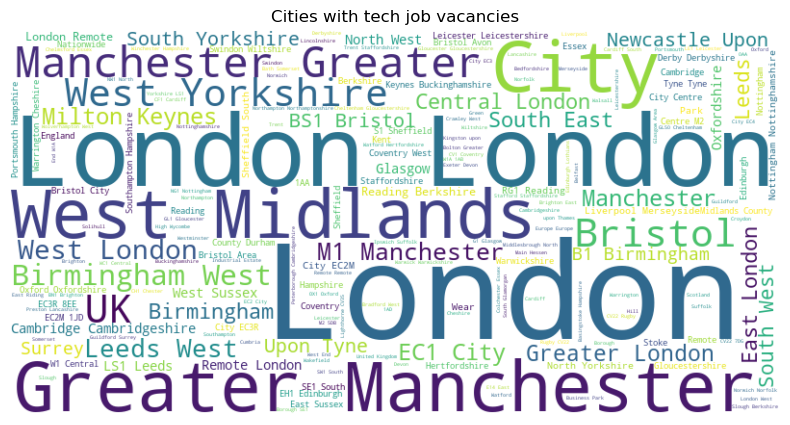

In [69]:
# Cities with tech job vacancies

text = ' '.join(df2_eda['job_city'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)


plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Cities with tech job vacancies')
plt.show()


#### Insight: London is the city with the highest tech job vacancy

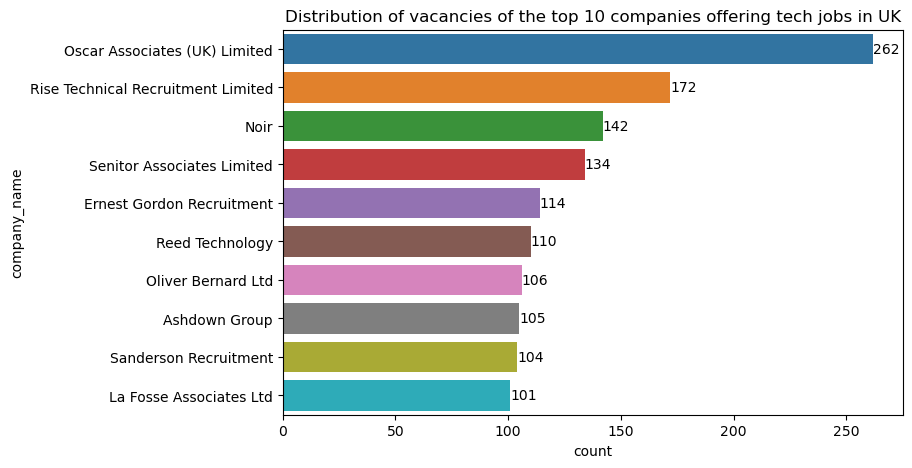

In [70]:
# Distribution of vacancies of top ten companies offering tech jobs in the UK
plt.figure(figsize=(8,5))
ax = sns.countplot(data=df2_eda, y='company_name', order=df2_eda['company_name'].value_counts(ascending=False).index[0:10])
values = df2_eda['company_name'].value_counts
ax.bar_label(container = ax.containers[0], label=values, label_type='edge')
plt.title('Distribution of vacancies of the top 10 companies offering tech jobs in UK');

#### Insights: Among the top ten companies with tech job vacancies, Oscar Associates (UK) Limited tops the chart, 2% (262) of the jobs advertised comes from them. Other companies recorded among the top ten includes Rise Technical Recruitment Limited and Noir.

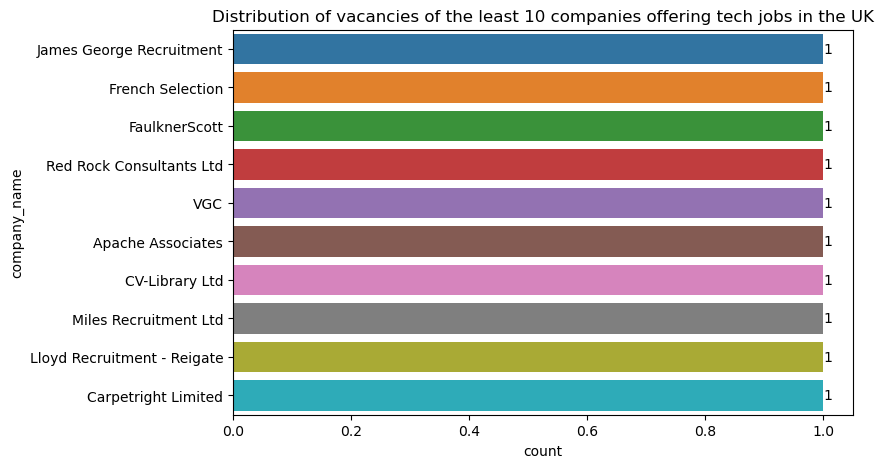

In [71]:
# Distribution of vacancies of the least 10 companies offering tech jobs in the UK
plt.figure(figsize=(8,5))
ax = sns.countplot(data=df2_eda, y='company_name', order=df2_eda['company_name'].value_counts(ascending=False).tail(10).index)
values = df2_eda['company_name'].value_counts
ax.bar_label(container = ax.containers[0], label=values, label_type='edge')
plt.title('Distribution of vacancies of the least 10 companies offering tech jobs in the UK');

#### Insights: Among the least ten companies with tech job vacancies, companies like Carpetright Limited, Lloyds Recruitment Ltd Miles Recruitment and more are listed with just one job advert each.

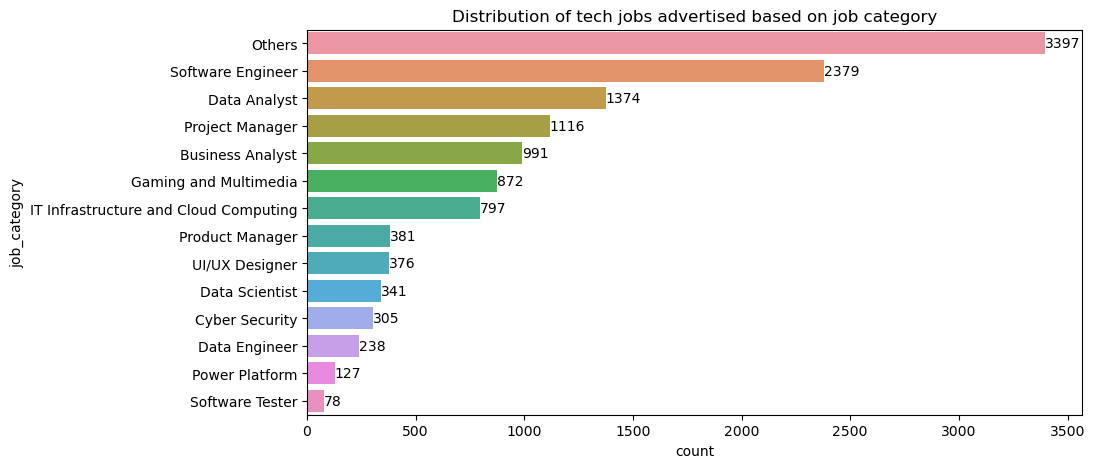

In [72]:
# Distribution of tech jobs advertised based on their job category

plt.figure(figsize=(10,5))
ax = sns.countplot(data=df2_eda, y='job_category', order = df2_eda['job_category'].value_counts(ascending=False).index)
plt.title('Distribution of tech jobs advertised based on job category')
values = df2_eda['job_category'].value_counts
ax.bar_label(container=ax.containers[0], label=values, label_type='edge');

In [74]:
df2_eda['job_category'].value_counts()

Others                                   3397
Software Engineer                        2379
Data Analyst                             1374
Project Manager                          1116
Business Analyst                          991
Gaming and Multimedia                     872
IT Infrastructure and Cloud Computing     797
Product Manager                           381
UI/UX Designer                            376
Data Scientist                            341
Cyber Security                            305
Data Engineer                             238
Power Platform                            127
Software Tester                            78
Name: job_category, dtype: int64

#### Insights: Software Engineer, Data Analyst, Project Manager and Business Analyst are the top 4 tech jobs being advertised in  United Kingdom, while Software Tester and Power Platform are the least

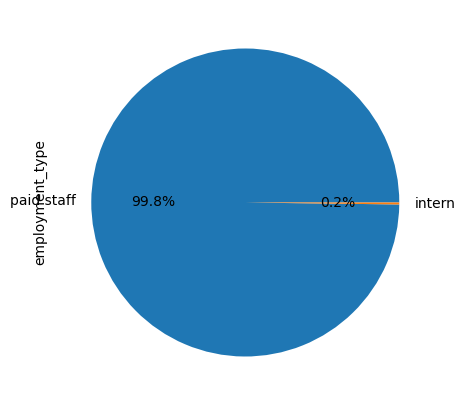

In [76]:
# Percentage of tech jobs based on employment type
plt.figure(figsize=(8,5))
df2_eda["employment_type"].value_counts().plot.pie(autopct = "%2.1f%%")
ax.set_title("Percentage of tech jobs based on the employment type");

#### Insights: 99.8% of the tech jobs advertised are paid jobs.

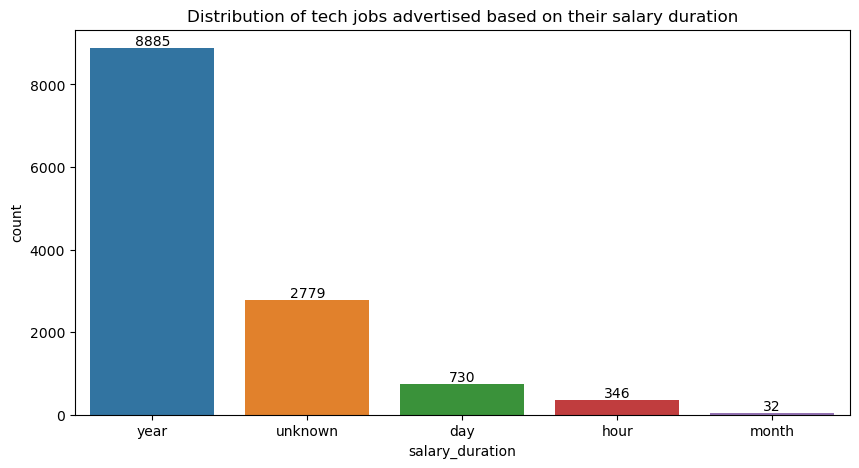

In [77]:
# Distribution of tech jobs based on salary duration

plt.figure(figsize=(10,5))
ax = sns.countplot(data=df2_eda, x='salary_duration', order=df2_eda['salary_duration'].value_counts(ascending=False).index)
plt.title('Distribution of tech jobs advertised based on their salary duration')
values = df2_eda['salary_duration'].value_counts
ax.bar_label(container =ax.containers[0], label=values, label_type='edge');

In [78]:
df2_eda['salary_duration'].value_counts()

year       8885
unknown    2779
day         730
hour        346
month        32
Name: salary_duration, dtype: int64

 #### Insights: About 69.5% of the jobs advertised are annual salary jobs, 5.7% are per day jobs while the least is the monthly duration job which is about 0.3%

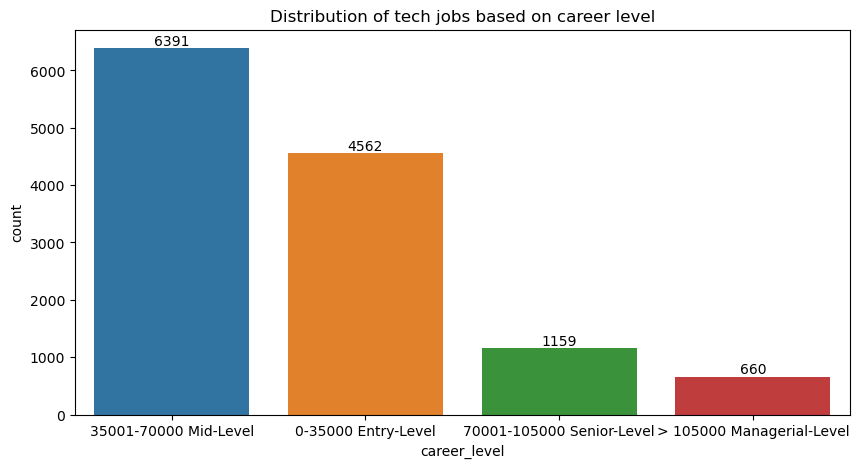

In [79]:
# Distribution of tech jobs based on career level

plt.figure(figsize=(10,5))
ax = sns.countplot(data=df2_eda, x='career_level', order=df2_eda['career_level'].value_counts(ascending=False).index)
plt.title('Distribution of tech jobs based on career level')
values = df2_eda['career_level'].value_counts
ax.bar_label(container =ax.containers[0], label=values, label_type='edge');

#### Insights: About 50% of the jobs vacancies is for Mid-Level career position with salary scale within 35,001 and 70,000 , while about 36% is for EntryLevel (below 35,000), and the least is 5%, which the Managerial Level career position (salary above 105,000).

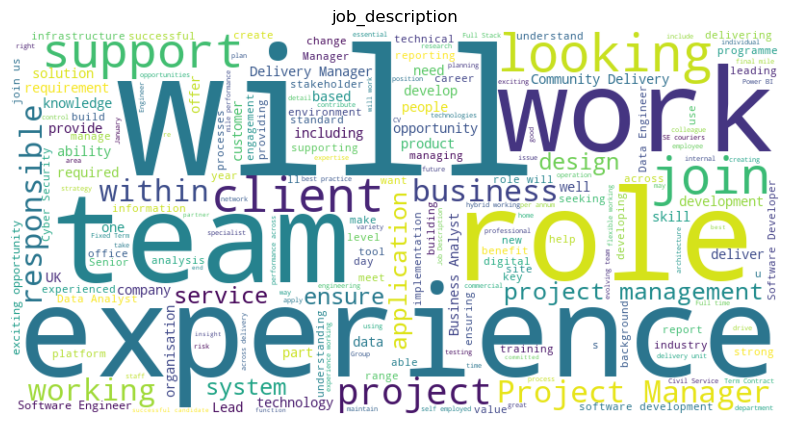

In [80]:
# wordcloud showing job description
text = ' '.join(df2_eda['job_description'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('job_description')
plt.show()

#### Insight: The job description did not show much, but team work and experience are very important requirements in these tech jobs

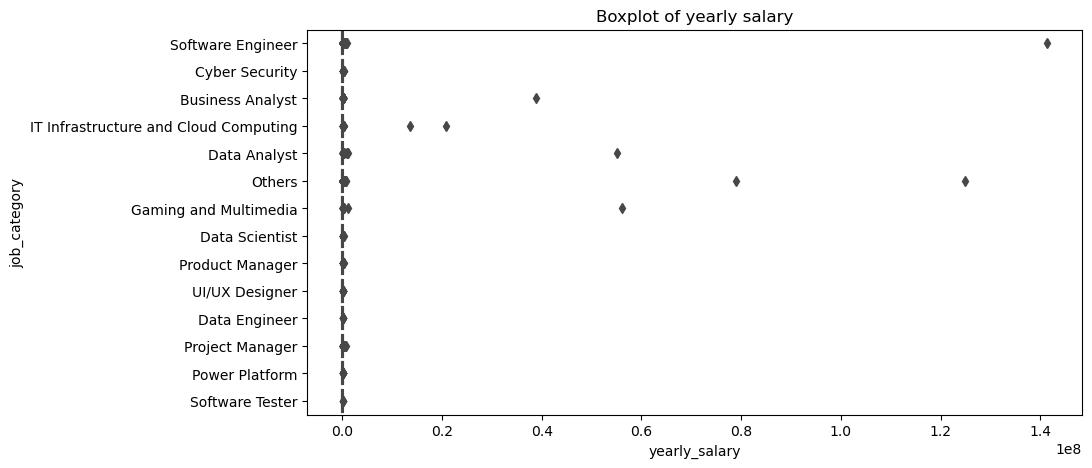

In [82]:
# Boxplot of the yearly salary...to see if there are outliers
plt.figure(figsize=(10,5))
sns.boxplot(y="job_category", x="yearly_salary", data=df2_eda);
plt.title('Boxplot of yearly salary');

#### Insights: The annual salary for some of the tech roles like Data Scientist, Product Manager, Data Engineer, Power Platform are consistent, that is they do not record any unusual values.

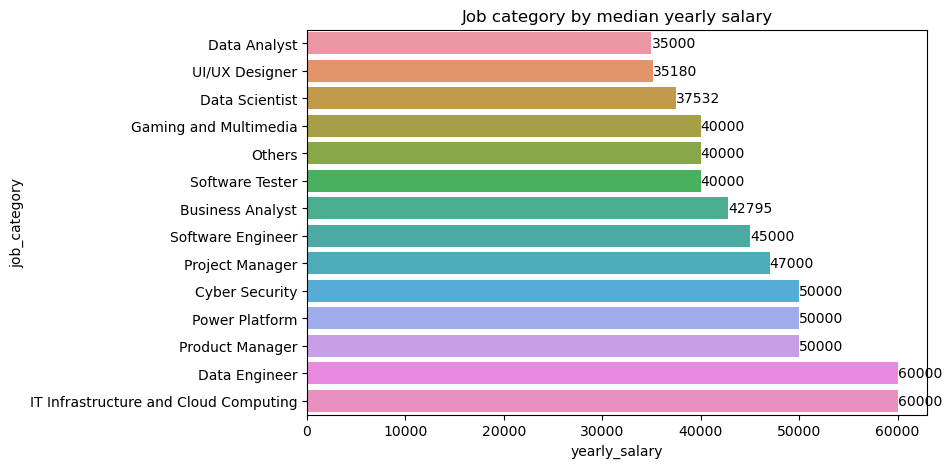

In [90]:
# Job categories by their median yearly salary
plt.figure(figsize=(8,5))
job_salary = df2_eda.groupby("job_category")["yearly_salary"].median().reset_index()
job_salary = job_salary.sort_values(by='yearly_salary')
ax=sns.barplot(data=job_salary, y="job_category", x="yearly_salary")
ax.set_title("Job category by median yearly salary")
values = job_salary['yearly_salary'].value_counts
ax.bar_label(container =ax.containers[0], label=values, label_type='edge');

#### Insights: Using their Median Salary, the Data Engineer and Cloud Computing jobs advertised has the highest earning of about  £60,000 each while Power Platform, Product Manager, and CyberSecurity earn about £50,000. But the least median salary is £35,000 recorded in Data Analyst career.

In [91]:
# Filter the DataFrame to include only rows where the duration is 'hour'
hourly_salary = df2_eda[df2_eda['salary_duration'] == 'hour']

# Calculate the median of 'min_salary_new' for each job category
procat = hourly_salary.groupby("job_category")["min_salary_new"].median().reset_index()



# Rename the columns for clarity
procat.columns = ["job_category", "median_salary_per_hour"]
procat

,job_category,median_salary_per_hour
0,Business Analyst,27.0
1,Cyber Security,12.0
2,Data Analyst,20.0
3,Data Engineer,55.0
4,Data Scientist,27.0
5,Gaming and Multimedia,22.0
6,IT Infrastructure and Cloud Computing,50.0
7,Others,35.0
8,Power Platform,46.0
9,Product Manager,26.0


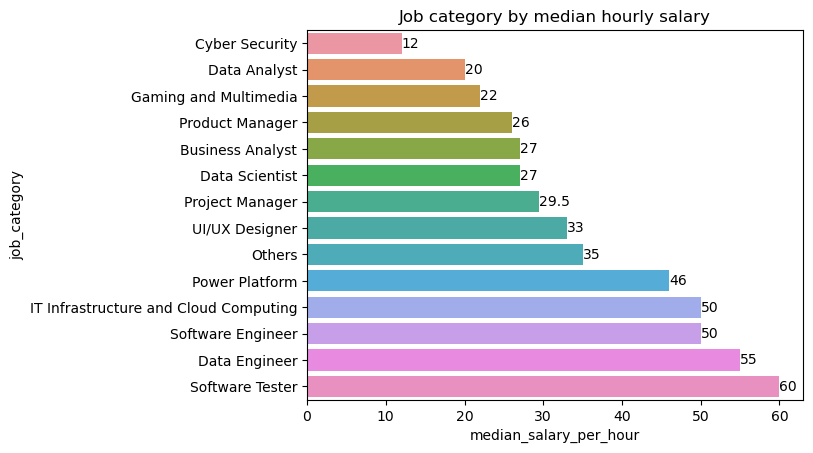

In [93]:
# Job category by their median hourly salary
ax=sns.barplot(data=procat,y="job_category", x="median_salary_per_hour")
procat=procat.sort_values(by='median_salary_per_hour').reset_index()
ax.set_title("Job category by median hourly salary")
values = procat['median_salary_per_hour'].value_counts
ax.bar_label(container =ax.containers[0], label=values, label_type='edge');

#### Insights: Data Enngineer, Software Tester, Software Engineer, Power Platform and Data Engineer are the top 5 jobs that earn between 45 to 60 pounds when paid on hourly basis,. The least pay on hourly basis is CyberSecurity.

In [94]:
# Filter the DataFrame to include only rows where the duration is 'hour'
daily_salary= df2_eda[df2_eda['salary_duration'] == 'day']

# Calculate the median of 'min_salary_new' for each job category
procat = daily_salary.groupby("job_category")["min_salary_new"].median().reset_index()


# Rename the columns for clarity
procat.columns = ["job_category", "median_salary_per_day"]
procat

,job_category,median_salary_per_day
0,Business Analyst,497.0
1,Cyber Security,575.0
2,Data Analyst,350.0
3,Data Engineer,565.0
4,Data Scientist,450.0
5,Gaming and Multimedia,500.0
6,IT Infrastructure and Cloud Computing,600.0
7,Others,400.0
8,Power Platform,500.0
9,Product Manager,500.0


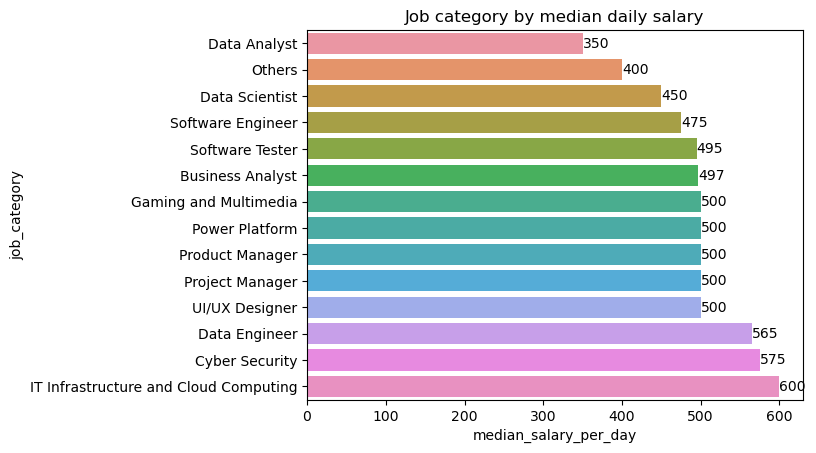

In [96]:
# Job category by their median daily salary
ax=sns.barplot(data=procat,y="job_category", x="median_salary_per_day")
procat=procat.sort_values(by='median_salary_per_day').reset_index()
ax.set_title("Job category by median daily salary")
values = procat['median_salary_per_day'].value_counts
ax.bar_label(container =ax.containers[0], label=values, label_type='edge');

#### Insights; The job category with the highest (500 to 600 pound) median salary per day includes Cyber Security, Data Engineer, Gaming and Multimedia, Cloud computing, Power Platform, Product Manager, UI/UX Designer and Project Manager.

In [97]:
df2_eda['job_category_skills'] = df2_eda['job_category_skills'].astype(str)


In [98]:
# Checking the data type
df2_eda['job_category_skills'].dtype

dtype('O')

In [99]:
df2_eda['job_category_skills'] = df2_eda['job_category_skills'].str.lower()

In [100]:
df2_eda.head(40)

,job_title,job_description,job_city,company_name,job_category,employment_type,min_salary_new,salary_duration,yearly_salary,career_level,job_category_skills
0,Junior JavaScript Games Developer,If you are looking to join a high tech industr...,Newtown,CareerAddict,Software Engineer,paid staff,27000,unknown,27000,0-35000 Entry-Level,programming languages software development ver...
1,Junior JavaScript Games Developer,If you are looking to join a high tech industr...,Branston,GSA Techsource Ltd,Software Engineer,paid staff,27000,unknown,27000,0-35000 Entry-Level,programming languages software development ver...
2,Lead C++ Games Developer,Lead C++ Games Developer | AAA Games | Up to £...,London,Langham Recruitment,Software Engineer,paid staff,80000,unknown,80000,70001-105000 Senior-Level,programming languages software development ver...
3,Cyber Security Specialist,Location: We operate a hybrid working model an...,London,Office for National Statistics,Cyber Security,paid staff,59400,unknown,59400,35001-70000 Mid-Level,network security information security security...
4,Business Analyst,We are looking for a Community Delivery Manage...,Remote,Understanding Recruitment Ltd,Business Analyst,paid staff,40000,year,40000,35001-70000 Mid-Level,business acumen requirements gathering busines...
5,Game Animation Developer C++ Unreal Engine,Game Animation Developer (C++ Unreal Engine 5 ...,London,Client Server,Software Engineer,paid staff,55000,unknown,55000,35001-70000 Mid-Level,programming languages software development ver...
6,UI Games Developer,UI Games Developer (Must have Games) | C++ | £...,London,Langham Recruitment,Software Engineer,paid staff,57500,unknown,57500,35001-70000 Mid-Level,programming languages software development ver...
7,Game Developer,Digital Waffle is currently partnered with a l...,London,Digital Waffle,Software Engineer,paid staff,45000,unknown,45000,35001-70000 Mid-Level,programming languages software development ver...
8,Game Programmer C++ Unreal Engine,Game Programmer (C++ Unreal Engine) *Remote / ...,Royal Leamington Spa,Client Server,Software Engineer,paid staff,65000,unknown,65000,35001-70000 Mid-Level,programming languages software development ver...
9,Senior Game Developer,Senior Game Developer\n\nOxford – Remote\n\n£5...,Oxford,Roc Search,Software Engineer,paid staff,62500,unknown,62500,35001-70000 Mid-Level,programming languages software development ver...


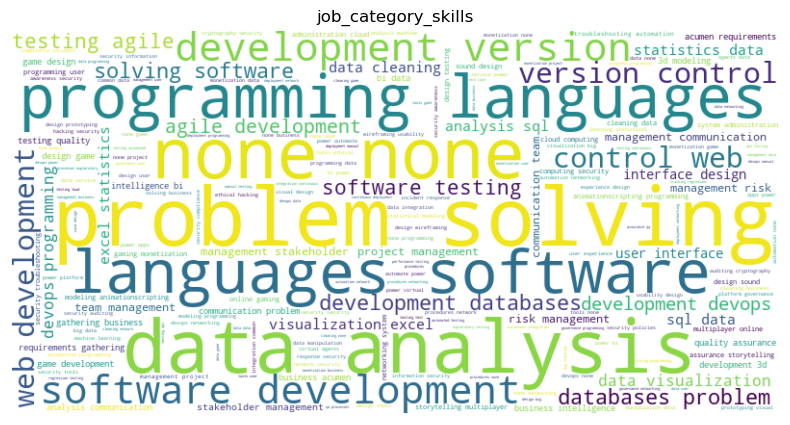

In [102]:
# wordcloud showing job category skills
text = ' '.join(df2_eda['job_category_skills'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('job_category_skills')
plt.show()

#### Insights: The skills that are in high demand are Data Analysis, Programming language and problem solving skill.

In [103]:
#sns.pairplot(df2_eda)

### RECOMMENDATIONS
#### Based on the analysis of tech jobs from UK jobsites the following was observed:
London is the city with the highest tech job vacancy. Among the top ten companies with tech job vacancies, Oscar Associates (UK) Limited tops the chart, 2% (262) of the jobs advertised comes from them. Other companies that were recorded among the top ten includes Rise Technical Recruitment Limited and Noir, while some of the least ten companies are Carpetright Limited, Lloyds Recruitment Ltd Miles Recruitment. 

Software Engineer, Data Analyst, Project Manager and Business Analyst are the top 4 tech jobs being advertised in United Kingdom, while Software Tester and Power Platform are the least. Almost all the tech jobs advertised are paid jobs.  About 69.5% of the jobs advertised are annual salary jobs, 5.7% are per day jobs while the least is the monthly duration job which is about 0.3%. 

Half of the jobs vacancies are mid-level career position with salary scale within £35,001 and £70,000, and more than one-third are entry-level (below £35,000) position, while a minute percentage(5%), are managerial_level career position (salary above £105,000). The job description did not show much, but team work and experience are very important requirements in these tech jobs. The annual salary for some of the tech roles like Data Scientist, Product Manager, Data Engineer, and Power Platform are consistent, that is they do not record any unusual values. Data Engineer and Cloud Computing jobs advertised has the highest median earning of about £60,000 each while Power Platform, Product Manager, and CyberSecurity earn about £50,000 each, but the least median salary £35,000, is recorded in Data Analyst career. Jobs like, Data Enngineer, Software Tester, Software Engineer, Power Platform and Data Engineer are the top 5 jobs that earn between £45 to £60 when paid on hourly basis while the least pay on hourly basis is CyberSecurity. The job category with the highest (£500 to £600) median salary pay per day includes Cyber Security, Data Engineer, Gaming and Multimedia, Cloud computing, Power Platform, Product Manager, UI/UX Designer and Project Manager. The skills that are in high demand are Data Analysis, Programming languages and problem solving skill.

#### Therefore we recommend the following:
##### To Job Seekers
   -For those in search of a tech job, living in London City or its environs, is a great advantage, as most of the vacancies are in the city of London.
   
   -Oscar Associates(UK) is a major recruiter, therefore we advise that you submit your CV to their site and register with them if need be, for regular updates.
    
   -Those intending to get into the tech space should ensure they are trained in institutions where post-training experience is provided as work exprience is necessary in the tech space.
    
   -If you are thinking of a career in the UK tech space, considering one of Software Engineer, Data Analyst, Project Manager or Business Analyst, is the way to go as these are the jobs in demand.
   
   -If high annual salary is a major reason for transitioning into tech, then you may consider high paying tech jobs like Data Engineer, Cloud Computing, Power Platform, Product Manager, or CyberSecurity while the high daily pay jobs(£500 to £600) are Cyber Security, Data Engineer, Gaming and Multimedia, Cloud computing, Power Platform, Product Manager, UI/UX Designer or Project Manager.
    - 

##### To Educational Tech providers
   -Ensure that you embed Data Analysis, Programming Languages and Problem Solving Skills into your curriculum, as they are the skills in high demand in the tech space.
   
   -Make sure to provide some form of internship or post-training experience for the students that train in your institution as team work and experience are key requirements for employment.
   
   -Software Engineer, Data Analyst, Project Manager and Business Analyst are courses that are in high demand in the UK market hence should be listed the tech educational institution.

##### To Employers
   -Look into your company's salary scale along side with the median salaries in this analysis, for all level of employment and ensure your company fall within the job market trend.
   
   -Continuous in-house training is neccessary to ensure that your staff are up to date in skills like Data analysis, programming language and problem solving skills.
    
   -From the analysis, vacancy for managerial level is few, this tells us that most companies, as a career progression path, look inwardly when filling managerial vacancies.
 
 


### CONCLUSION

  According to Science Times, Cloud Computing (DevOps Engineer) and Product Manager were listed as one of the ten highest paying jobs in the UK, while other tech jobs listed were Data Science and Software Engineer (Science Times, 2023). Furthermore, similarities were observed when our findings were compared with a different country, in this, the US Bureau of Labour Statistics listed software developer and Data Science as one of the 20 occupations with the highest projected percentage change of employment between 2022 and 2032 (US Bureau of Labour Statistics, [September 6, 2023]).
 
   In conclusion, our analysis aligns with the insights provided by reputable sources such as Science Times and the US Bureau of Labour Statistics. The demand for tech jobs like Cloud Computing, Product Management, Data Science, Business Analyst, Data Analsyst, CyberSecurity, UI/UX Designer and Software Engineering continues to grow, making them among the highest paying and most promising tech career paths in the UK . This reaffirms the significance of pursuing a career in the tech industry, where opportunities are abundant and salaries are competitive.

### CONSTRAINTS
Data quality was a major constraint in this analysis, there were lots of missing values and inconsistencies in the data set, limited features and, also the quantity of the data was too small. All these hindered our ability to go further in building a machine learning model.

### REFERENCE

Science Times. (2023, February 23). 10 Highest Paying Tech Jobs in the UK and a Few More in High Demand. Science Times. [https://www.sciencetimes.com/articles/42557/20230223/10-highest-paying-tech-jobs-in-the-uk-and-a-few-more-in-high-demand.htm]

U.S. Bureau of Labor Statistics. "Fastest Growing Occupations." Bureau of Labor Statistics, U.S. Department of Labor, modified 6 September, 2023, https://www.bls.gov/ooh/fastest-growing.htm